# Using the AdEx neuron model in Nest

- [nest example using adex](https://nest-simulator.readthedocs.io/en/stable/auto_examples/brette_gerstner_fig_3d.html)

- [neuron model information](https://nest-simulator.readthedocs.io/en/stable/models/neurons.html#classnest_1_1aeif__cond__exp)

- [adex scholarpedia page](http://www.scholarpedia.org/article/Adaptive_exponential_integrate-and-fire_model)

### About AdEx

`aeif_cond_exp` is the adaptive exponential integrate and fire neuron according to Brette and Gerstner (2005), with post-synaptic conductances in the form of truncated exponentials.

Adaptive Exponential neuronal model, or AdEx for short. It's dynamics are defined by two state variables, the membrane potential and a refractory variable, which indicates the state of the refractory mechanisms (such as Na+ inactivation and K+ activation).

---

All parameters of the Adaptive Exponential Integrate-and-Fire model have a biological interpretation:

- In the absence of adaptation, $V_{th}$ is the maximum voltage that can be reached under constant current injection without generating a spike (rheobase current). In the presence of adaptation the voltage corresponding to the rheobase current is shifted.
- The slope factor $\Delta T$ quantifies the *sharpness* of spikes. It can be related to the sharpness of the Na+ activation curve, when one neglects the activation time constant. In the limit of zero slope factor, the model becomes an integrate-and-fire model with a fixed threshold $V_{th)$.
- Spike triggered adaptation (the parameter $b$) summarizes the effect of Ca++ dependent K+ channels under the assumption that calcium influx occurs mainly during an action potential. Note that the coupling of voltage and adaptation via the parameter a also contributes to spike-triggered adaptation because of the sharp rise of the voltage during the upswing of an action potential.
- Parameters $V_{th}$ and $\Delta T$ in Equation (1) can be extracted from experiments using the technique of dynamic I-V curves (Badel et al, 2008). The subthreshold parameters can be extracted from experiments by standard linear identification methods.

![](http://www.scholarpedia.org/w/images/thumb/4/4f/AdExRS.png/300px-AdExRS.png)

Adaptation and regular firing of the AdEx model in response to a current step; voltage (top) and adaptation variable (bottom); parameters from Brette and Gerstner (2005).

![](http://www.scholarpedia.org/w/images/thumb/e/ec/AdEx4classes.png/400px-AdEx4classes.png)

Response of 4 AdEx models with different parameter values to current steps: A) phasic spiking, B) tonic bursting, C) phasic bursting, D) post-inhibitory rebound.

# Set AdEx parameter values

In [31]:
# define a function that 'parameterizes' the neuron according to its 'spiking type' (phasic, tonic, ...)

def set_params(name=False):
    
    # simulation parameters(same as LIF)
    N_total = 1200
    NE = 960
    NI = 240
    n_threads = 8
    stim_start = 0.
    stim_end = 150.
    simtime = 1000.
    sub_fr = 0.9
    sup_fr = 1.01
    resolution = 0.1
    
    # synaptic params
    E_ex = 0.0
    E_in = -80.0
    tau_syn_ex = 0.326
    tau_syn_in = 0.326
    J_ex = 6.0
    J_in = -95.0
    
    # === from (Brette & Gerstner, 2005) ===
    
    # membrane parameters
    C_m = 281.0 # capacitance
    g_L = 30.0 # leaky conductance
    E_L = -70.6
    t_ref = 2.0
    delay = 1.5
    
    # spike adaptation parameters
    V_th = -50.4
    Delta_T = 2.0 # slope factor
    tau_w = 144.0 # adaptation time constant in ms
    a = 4.0 # subthreshold adaptation in nS
    b = 80.5 # spike-triggered adaptation in pA
    V_peak = 20.# Spike detection threshold
    V_reset = -70.6 # Reset value for V_m after a spike
    
#     # different values from Elias
#     tau_m = C_m/g_L # ??
#     Vcut = V_th + (5*Delta_T) # ??? (same as V_peak?)
#     tau_w = 150.0 # adaptation time constant

#     # stimulation parameters:
#     I0=0.0
#     dv0=0.0 # voltage transient
#     T0=50.0
#     T1=500.0
#     T2=100.0
        
    if name == 'phasic':
        a = 2*(C_m/tau_w) # Subthreshold adaptation (type II)
        b = 0.0 # spike-triggered adaptation
        E_L = -60.0 
#         I_john = (1+a/g_L)*log(1+tau_m/tau_w)-(1+tau_m/tau_w)
#         I0=gL*DeltaT*I_john+(VT-EL)*(gL+a)-0.03
#         I=I0
#         T0=100.0
#         T1=200.0
#         T2=20.0
#         dv0=2.5
        
    elif name=='rebound_spike':
        tau_w = 150.0
        a = 200.0
        b = 0.1 
        E_L = -60.0
        V_th = -54
        V_reset = -60.0
        #         I0=0*nA
        #         I=-0.5*nA
        #         T1=50*ms

    elif name=='rebound_burst':
        tauw = 150.0
        a = 200.0
        b = 0.1
        #         I0=0*nA
        #         I=-0.5*nA
        EL = -60.0
        #         T1=50*ms
        V_th = -54.0
        V_reset = V_th + 3.0

    elif name=='regular':
        
        tau_w = 144.0
        a = 4.0 # subthreshold adaptation in nS
        b = 80.5 # spike-triggered adaptation in pA
       
        V_reset = -70.6
#        I=1*nA
        
    elif name=='on_off':
        
        tau_w = 10.0
        a = 800.0
        b = 10000.0
        V_reset = -70.6
#        I=11*nA
        
    elif name=='oscillator': # numerical integration problem
        
        tau_w = 14.0
        a = 8000.0
        b = 80.5
        V_reset = -70.6
#       I=1.3*nA

    elif name=='mixed':
        
        tau_w = 144.0
        a = 4.0
        b= 150.0
        V_reset = V_th + 2.0
#        I=1*nA

    elif name=='fast':
        # Type II: a > C/tauw
        tau_w = 144.0
        a = 2*(C_m/tau_w)
        b = 0.0
        V_reset = -70.6
#         I_john=(1+a/gL)*log(1+taum/tauw)-(1+taum/tauw)
#         I=gL*DeltaT*I_john+(VT-EL)*(gL+a)+0.01*nA
#         I0=I-0.1*nA
#         T0=200*ms

    elif name=='bursting_tonic':
        
        tau_w = 20.0
        a = 4.0
        b = 500 
        V_reset = V_th + 5.0
#        I=.8*nA
 
    elif name=='bursting_phasic':
        
        tau_w = 144.0
        a = 4.0
        b = 100
        V_reset = V_th + 4.0
        #I=.6*nA
        
    elif name=='bursting_phasic2': # big burst, then small bursts
        tau_w = 144.0
        a = 4.0
        b = 150.0
        V_reset = V_th + 2.0
        #I=1.5*nA

    # put it all in two dicts
    sim_params = {'N_total':N_total, 'NE':NE, 'NI':NI, 'n_threads':n_threads, 'stim_start':stim_start, 'stim_end':stim_end, 
                  'simtime':simtime, 'sub_fr':sub_fr, 'sup_fr':sup_fr, 'resolution':resolution,'J_ex':J_ex, 
                  'J_in':J_in, 't_ref':t_ref, 'E_ex':E_ex, 'E_in':E_in, 'tau_syn_ex':tau_syn_ex, 'tau_syn_in':tau_syn_in,  
                  'delay':delay
                 }
    
    model_params = {'C_m':C_m, 'g_L':g_L, 'E_L':E_L, 'a':a, 'b':b, 'tau_w':tau_w, 'V_th':V_th, 'Delta_T':Delta_T, 
                    'V_reset':V_reset,  'V_peak': V_peak
                   }
    
    return sim_params, model_params

# START HERE

- dashed lined mark the beginning and end of stimulation

$w$ - adaptation current 

$a$ - subthreshold adaptation: ionic channels that can hyperpolarise the channels (K+) 

$b$ - spike triggered adaptation: effect of Ca++ dependent K+ channels (assuming Ca++ influx happens mostly during a spike

$\Delta T$ - quantifies the sharpness of spikes.

## 1. Parameterisation: `fast`

In [18]:
# set the parameter value for AdEx Neuron
sim_params, model_params = set_params(name='fast')
# get simulation data
multimeters, times_lst, events_lst, spike_times_arr, spike_neurons_arr = simulate(patterns, sim_params, model_params)

Simulation done! time: 60 seconds


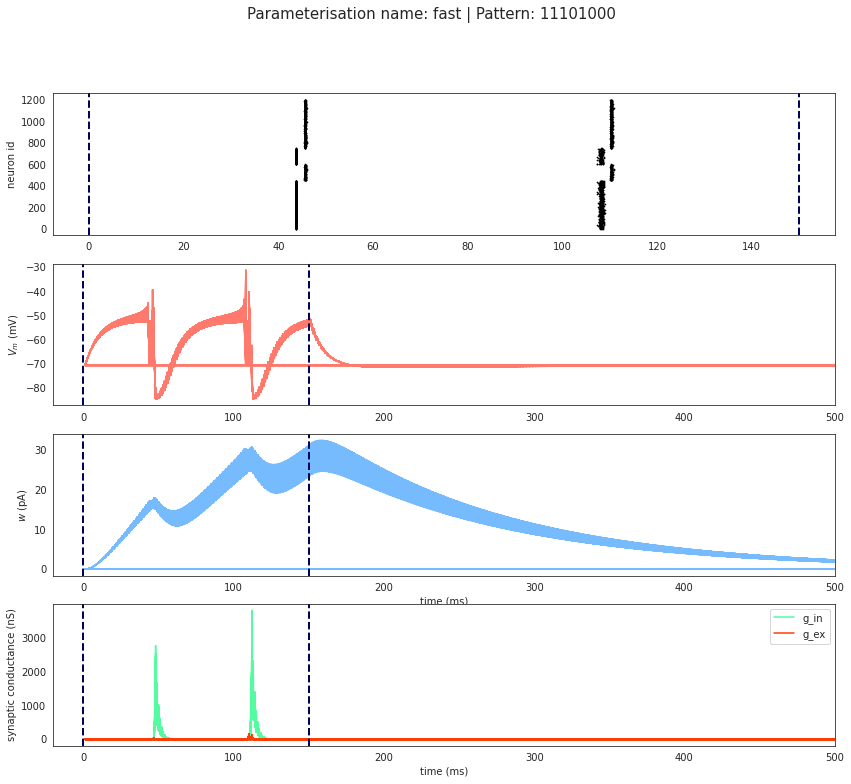

In [19]:
plot_statevars(spike_times_arr, spike_neurons_arr, times_lst, events_lst, idx=1,parameterisation='fast')

## 2. Parameterisation: `phasic`

In [20]:
# set the parameter value for AdEx Neuron
sim_params, model_params = set_params(name='phasic')
# get simulation data
multimeters, times_lst, events_lst, spike_times_arr, spike_neurons_arr = simulate(patterns, sim_params, model_params)

Simulation done! time: 61 seconds


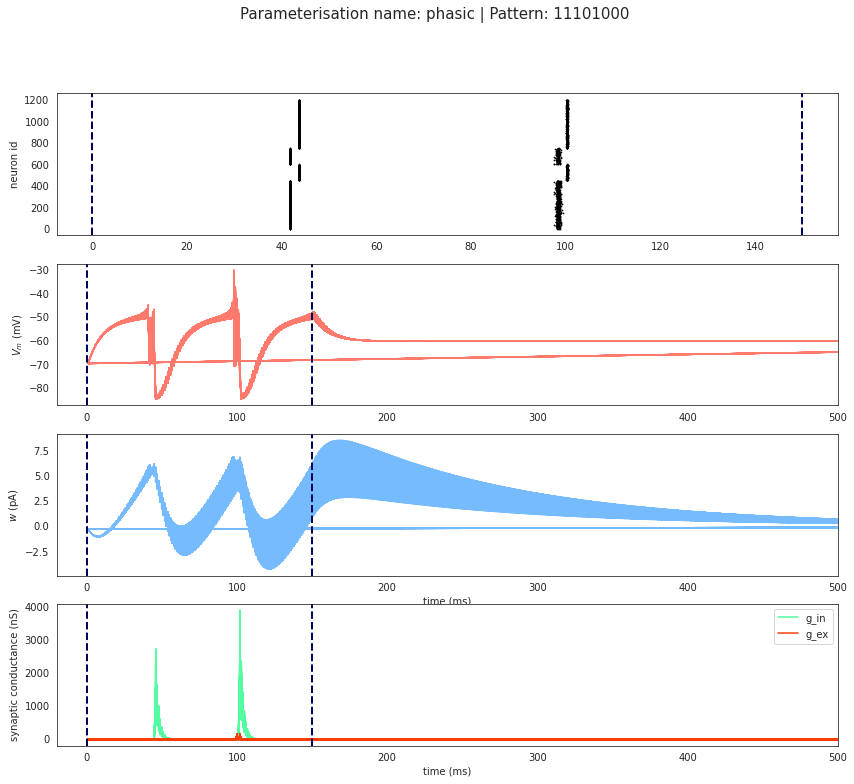

In [21]:
plot_statevars(spike_times_arr, spike_neurons_arr, times_lst, events_lst, idx=1,parameterisation='phasic')

## 3. Parameterisation: ` default` 

In [22]:
# set the parameter value for AdEx Neuron
sim_params, model_params = set_params()
# get simulation data
multimeters, times_lst, events_lst, spike_times_arr, spike_neurons_arr = simulate(patterns, sim_params, model_params)

Simulation done! time: 60 seconds


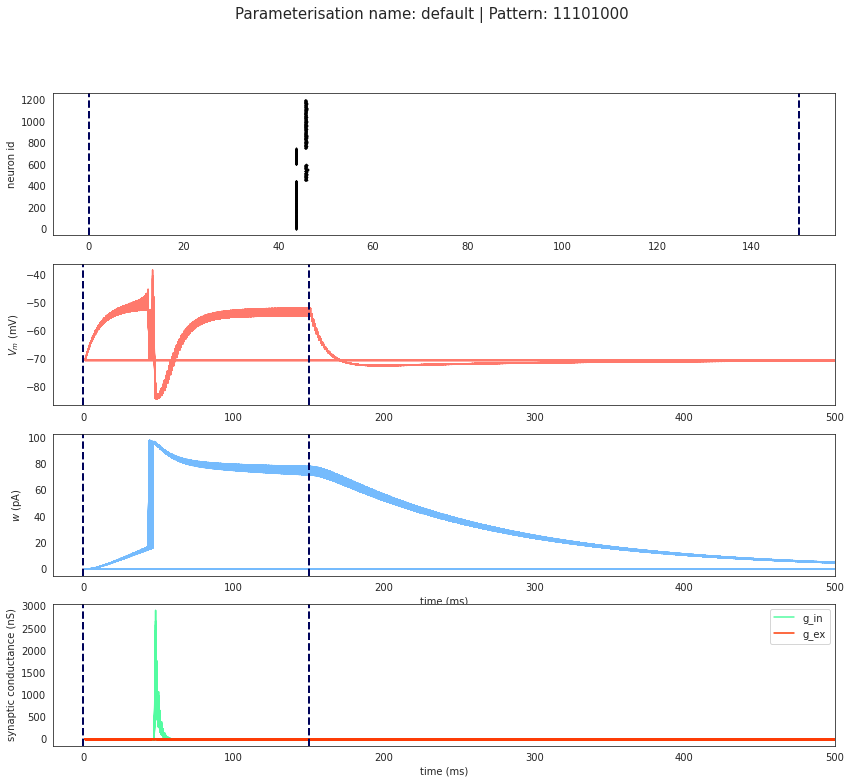

In [23]:
plot_statevars(spike_times_arr, spike_neurons_arr, times_lst, events_lst, idx=1,parameterisation='default')

## 4. Parameterisation `on_off`

In [24]:
# set the parameter value for AdEx Neuron
sim_params, model_params = set_params('on_off')
# get simulation data
multimeters, times_lst, events_lst, spike_times_arr, spike_neurons_arr = simulate(patterns, sim_params, model_params)

Simulation done! time: 46 seconds


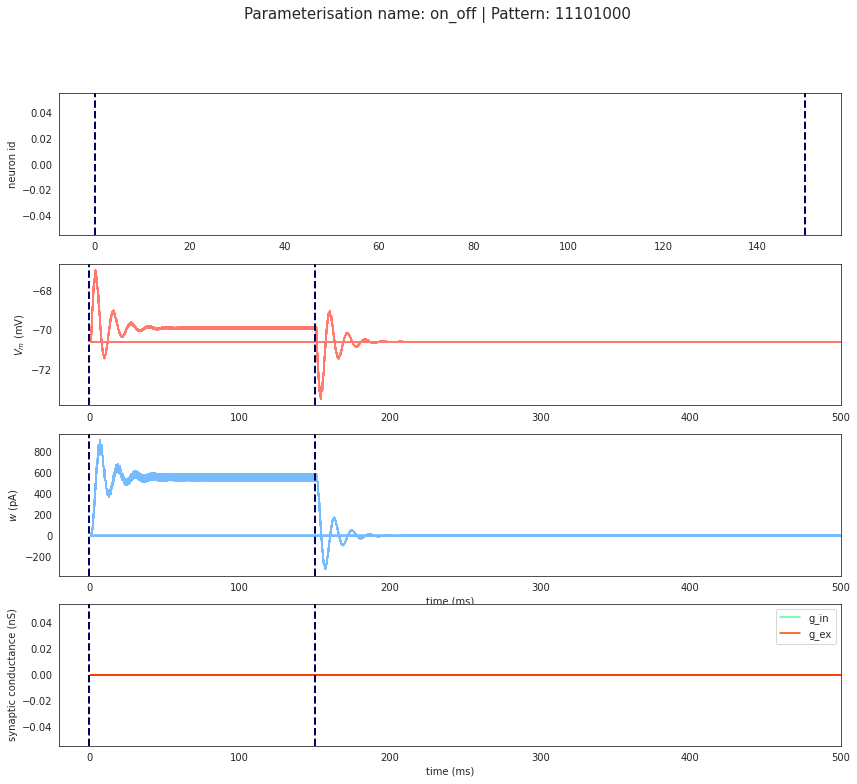

In [25]:
plot_statevars(spike_times_arr, spike_neurons_arr, times_lst, events_lst, idx=1,parameterisation='on_off')

## 5. Parameterisation  `oscillator`

In [22]:
# set the parameter value for AdEx Neuron
sim_params, model_params = set_params('oscillator')
# get simulation data
multimeters, times_lst, events_lst, spike_times_arr, spike_neurons_arr = simulate(patterns, sim_params, model_params)

Simulation done! time: 49 seconds


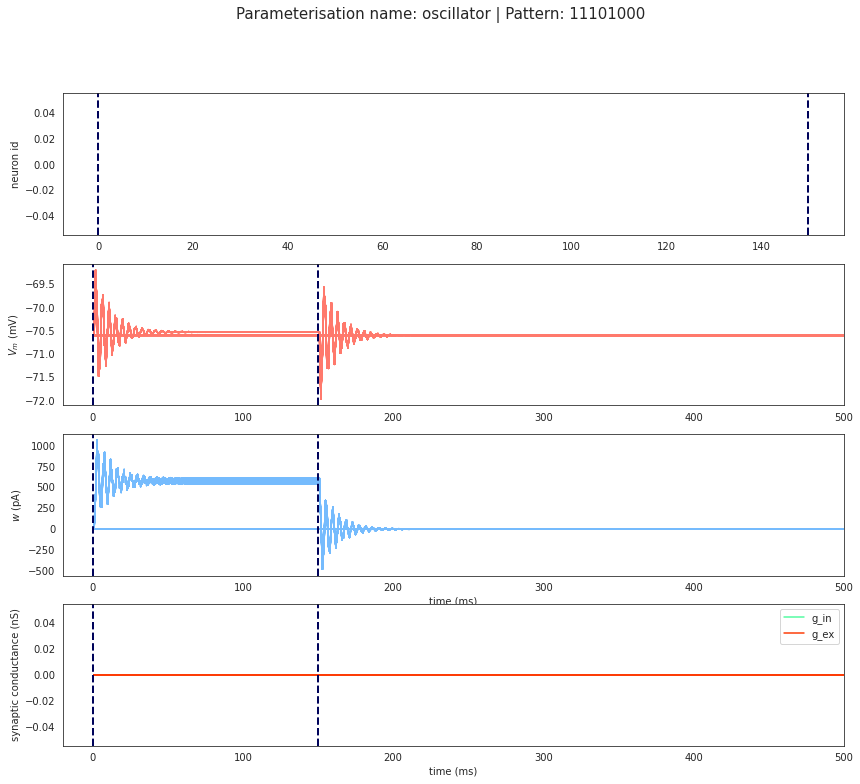

In [23]:
plot_statevars(spike_times_arr, spike_neurons_arr, times_lst, events_lst, idx=1,parameterisation='oscillator')

## 6. Parameterisation  `rebound_spike` --> error

In [11]:
# # set the parameter value for AdEx Neuron
# sim_params, model_params = set_params('rebound_spike')
# # get simulation data
# multimeters, times_lst, events_lst, spike_times_arr, spike_neurons_arr = simulate(patterns, sim_params, model_params)

In [ ]:
plot_statevars(spike_times_arr, spike_neurons_arr, times_lst, events_lst, idx=1,parameterisation='rebound_spike')

## 7. Parameterisation  `mixed`

In [26]:
# set the parameter value for AdEx Neuron
sim_params, model_params = set_params('mixed')
# get simulation data
multimeters, times_lst, events_lst, spike_times_arr, spike_neurons_arr = simulate(patterns, sim_params, model_params)

Simulation done! time: 60 seconds


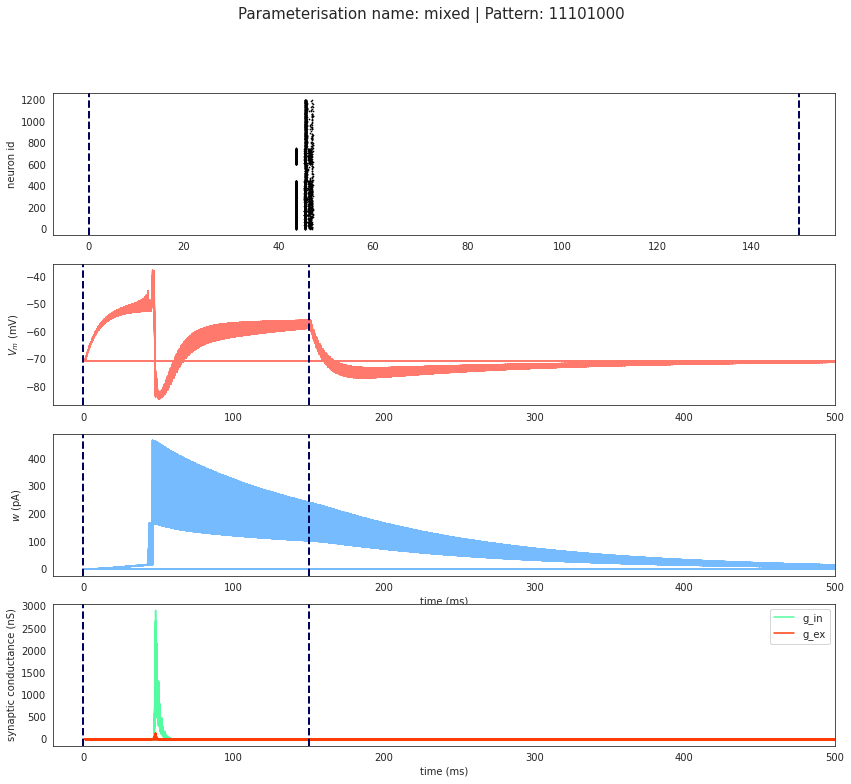

In [27]:
plot_statevars(spike_times_arr, spike_neurons_arr, times_lst, events_lst, idx=1,parameterisation='mixed')

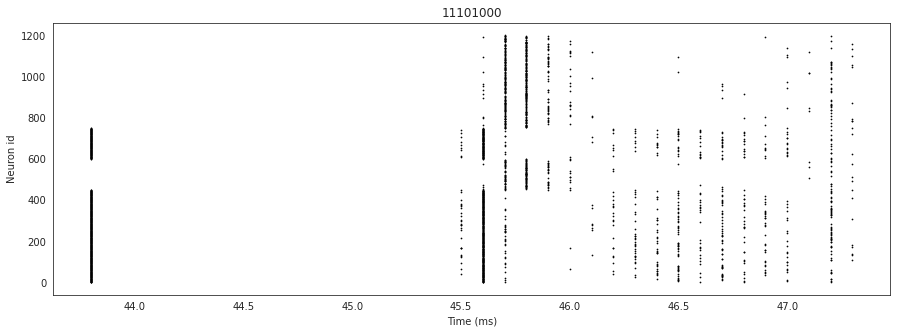

In [30]:
# zoomed in on the above raster plot
f = plt.figure(figsize=(15,5))
plt.title(H.list2str(patterns[1]))
plt.scatter(spike_times_arr[1], spike_neurons_arr[1], marker='o', s=0.5, color='k');
plt.xlabel('Time (ms)')
plt.ylabel('Neuron id');

## 8. Parameterisation  `bursting_tonic` --> error

In [18]:
# # set the parameter value for AdEx Neuron
# sim_params, model_params = set_params('bursting_tonic')
# # get simulation data
# multimeters, times_lst, events_lst, spike_times_arr, spike_neurons_arr = simulate(patterns, sim_params, model_params)

In [ ]:
plot_statevars(spike_times_arr, spike_neurons_arr, times_lst, events_lst, idx=1,parameterisation='bursting_tonic')

## 9. Parameterisation  `bursting_phasic` --> error

In [24]:
# # set the parameter value for AdEx Neuron
# sim_params, model_params = set_params('bursting_phasic')
# # get simulation data
# multimeters, times_lst, events_lst, spike_times_arr, spike_neurons_arr = simulate(patterns, sim_params, model_params)

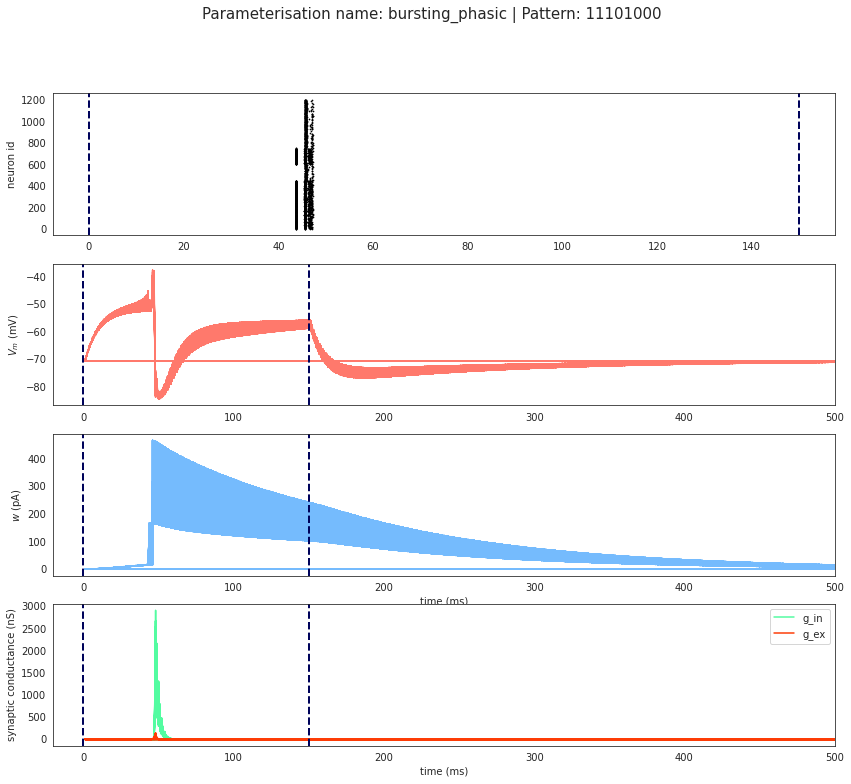

In [20]:
plot_statevars(spike_times_arr, spike_neurons_arr, times_lst, events_lst, idx=1,parameterisation='bursting_phasic')

## Display all plots

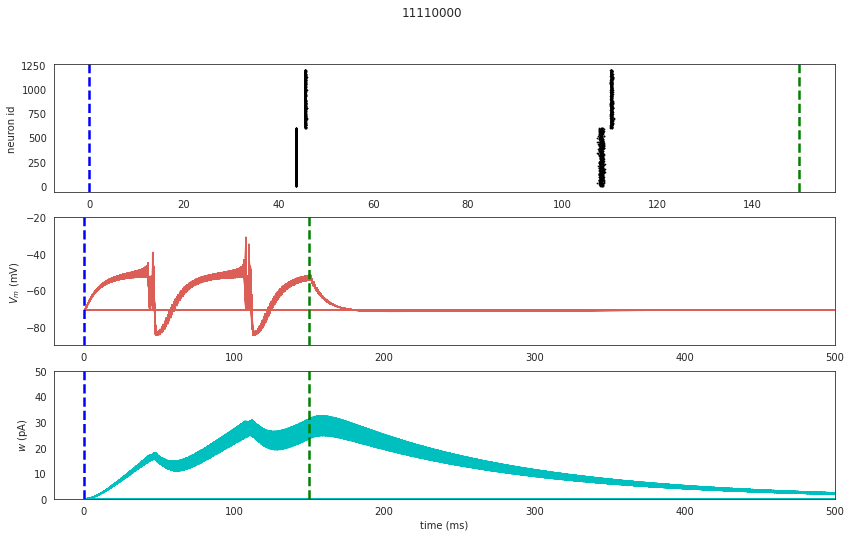

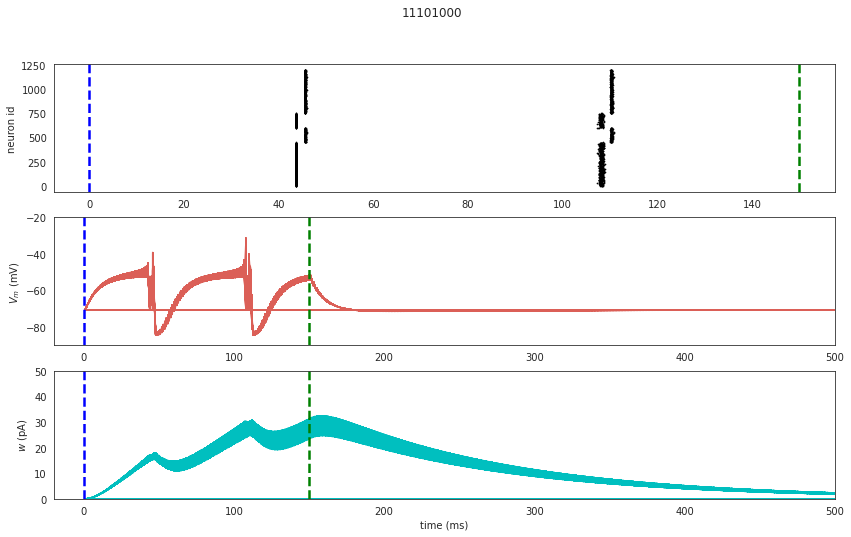

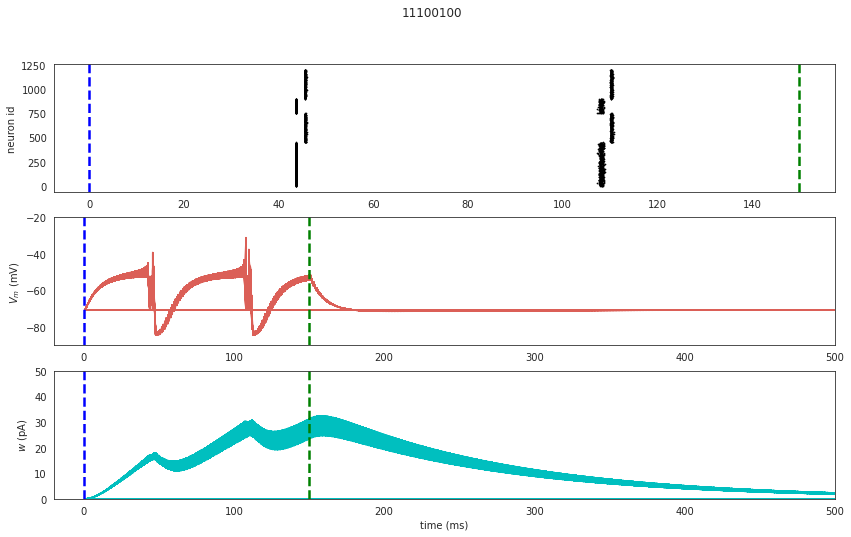

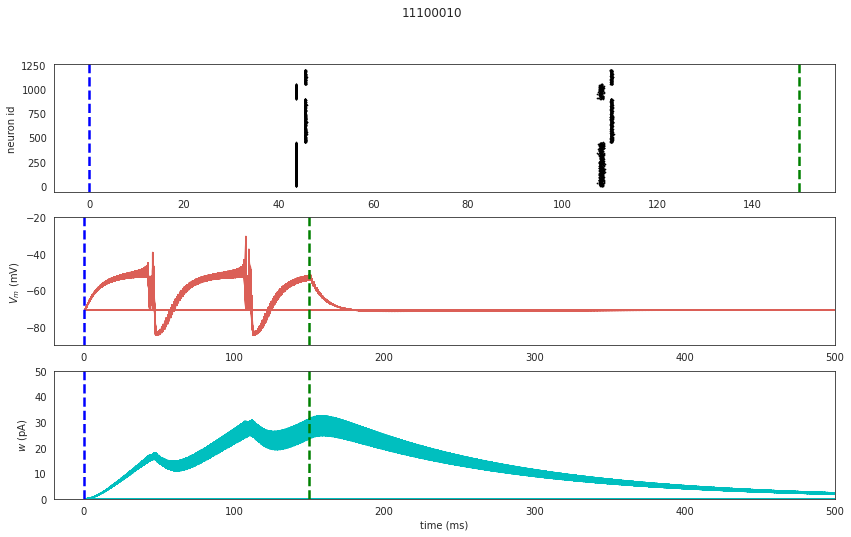

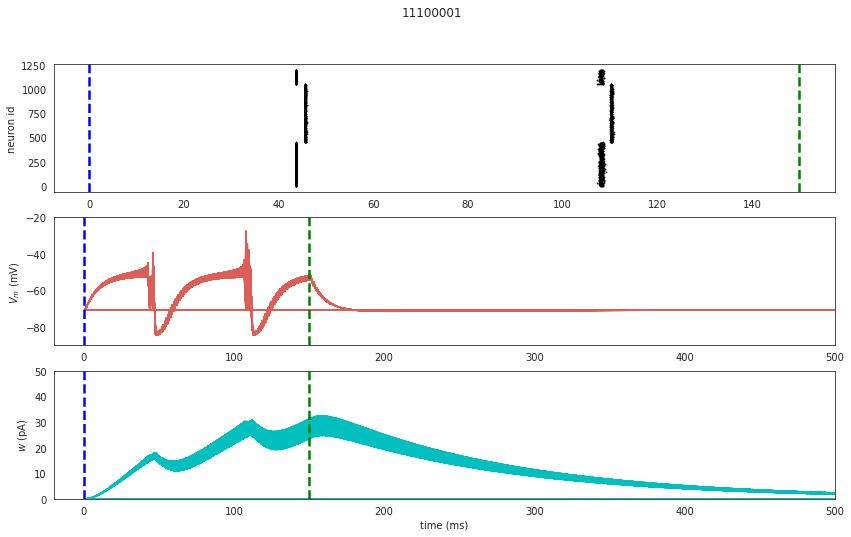

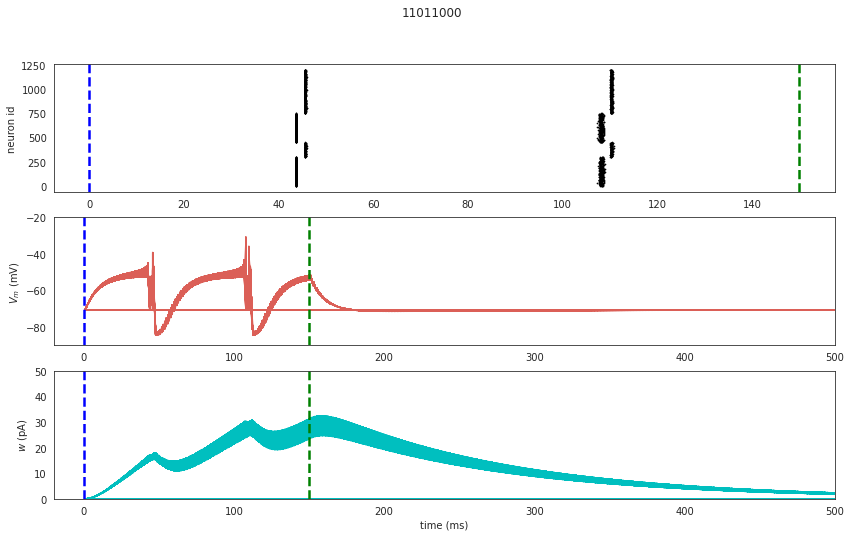

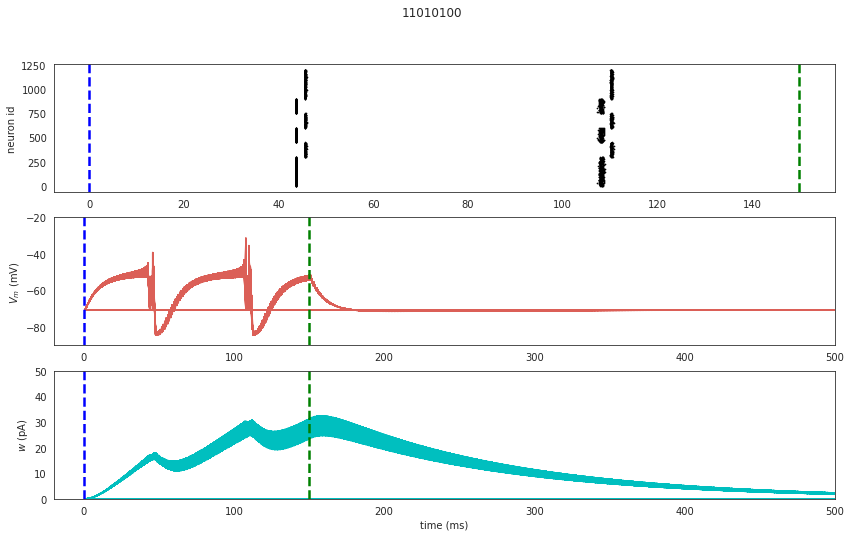

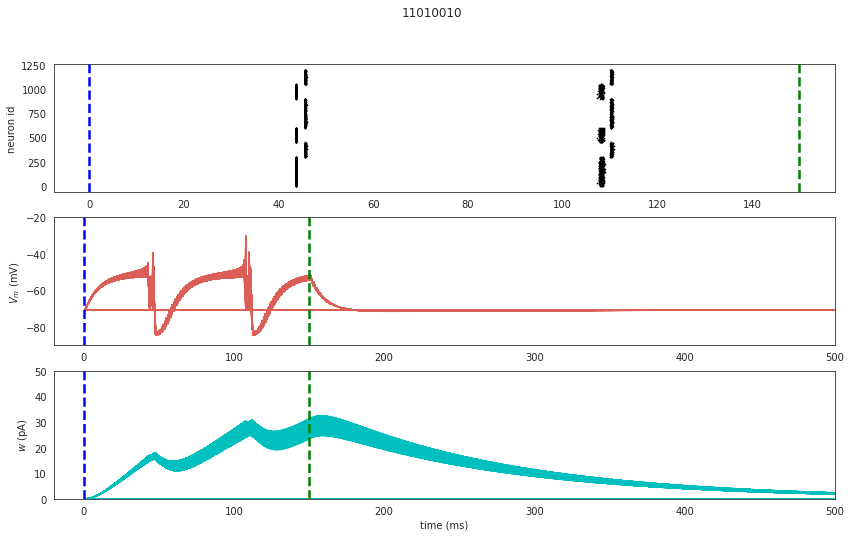

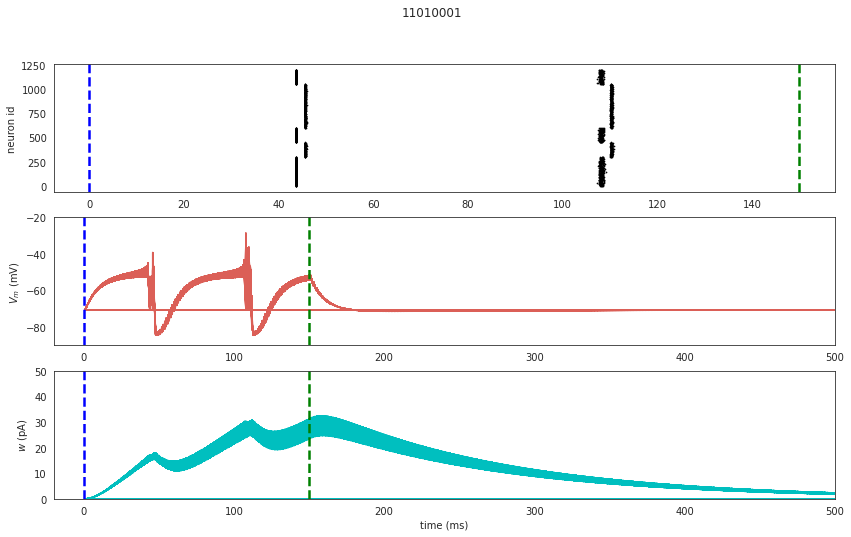

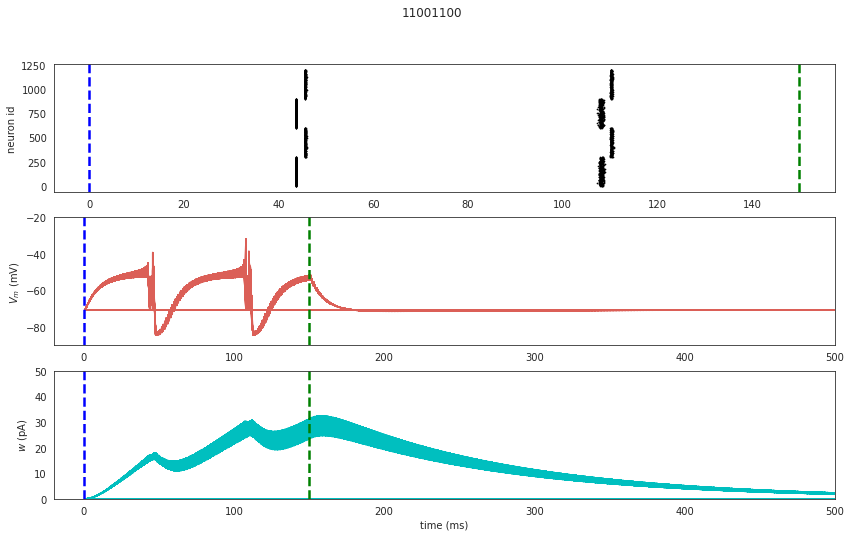

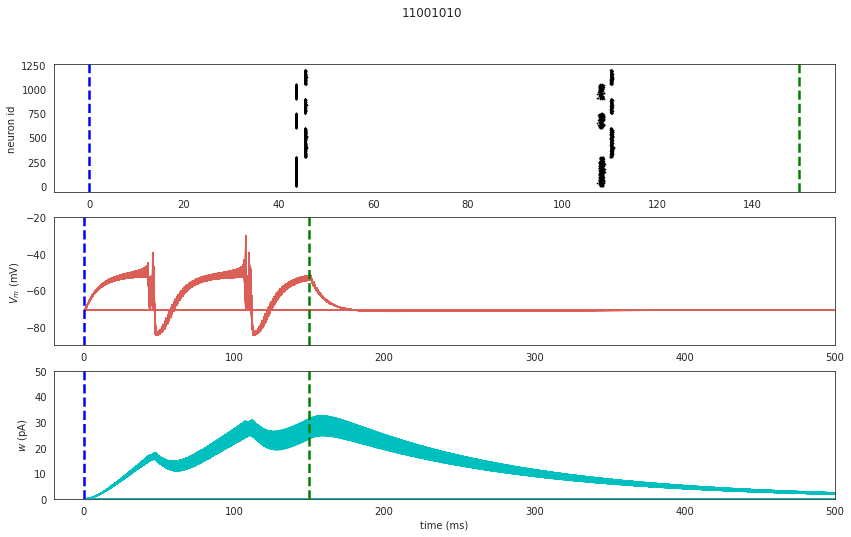

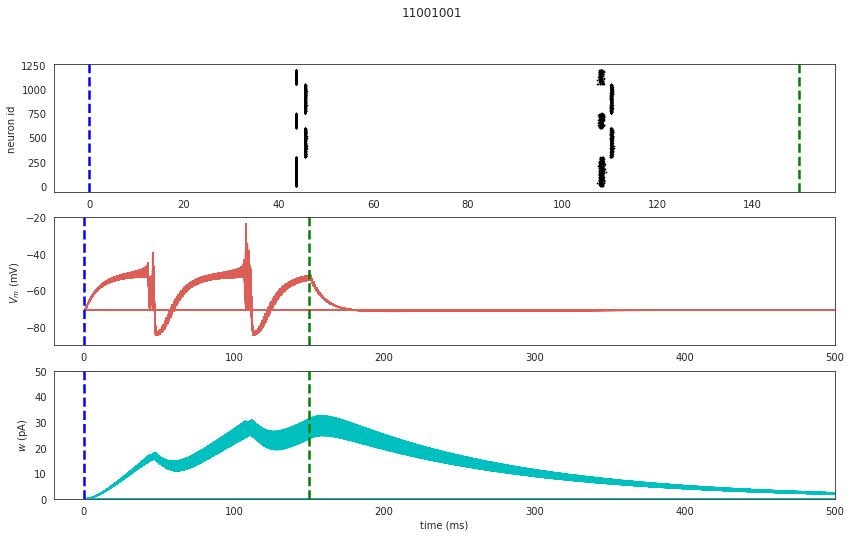

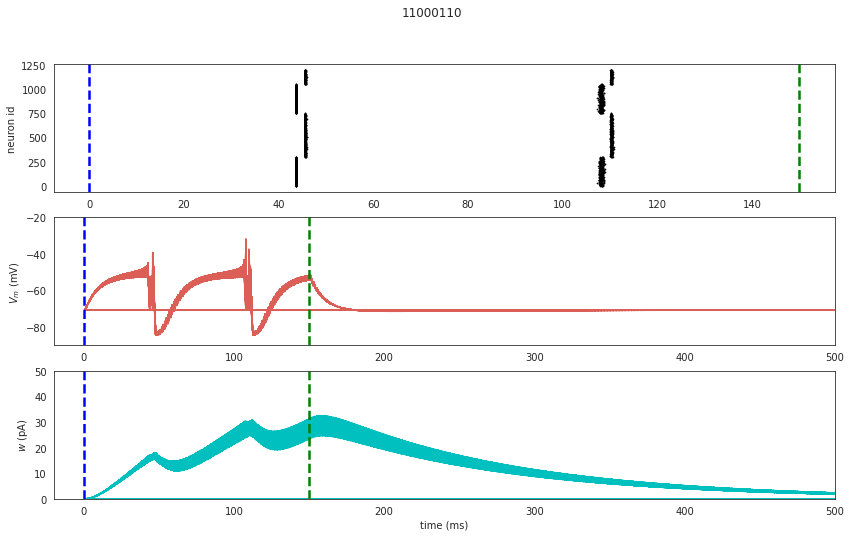

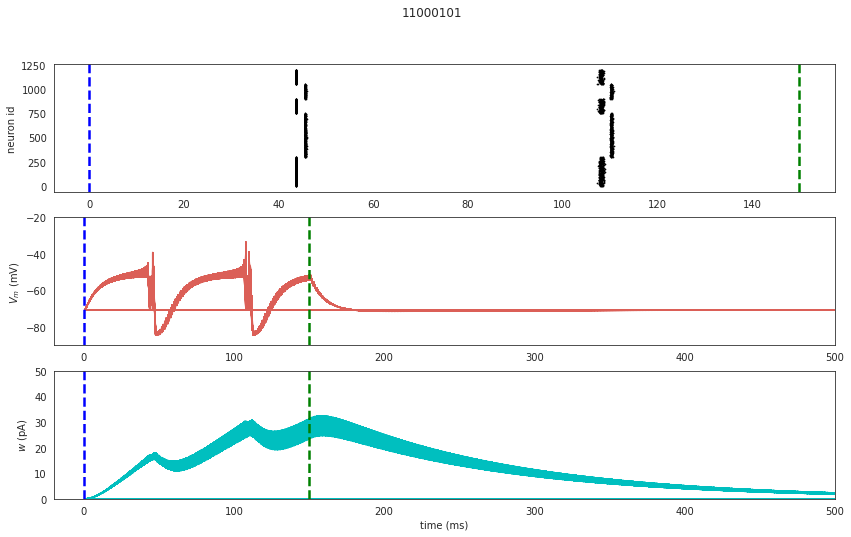

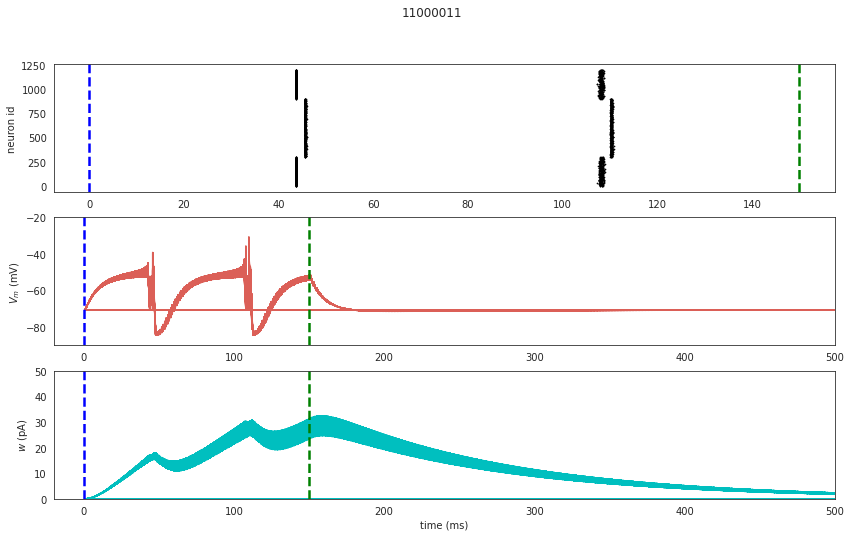

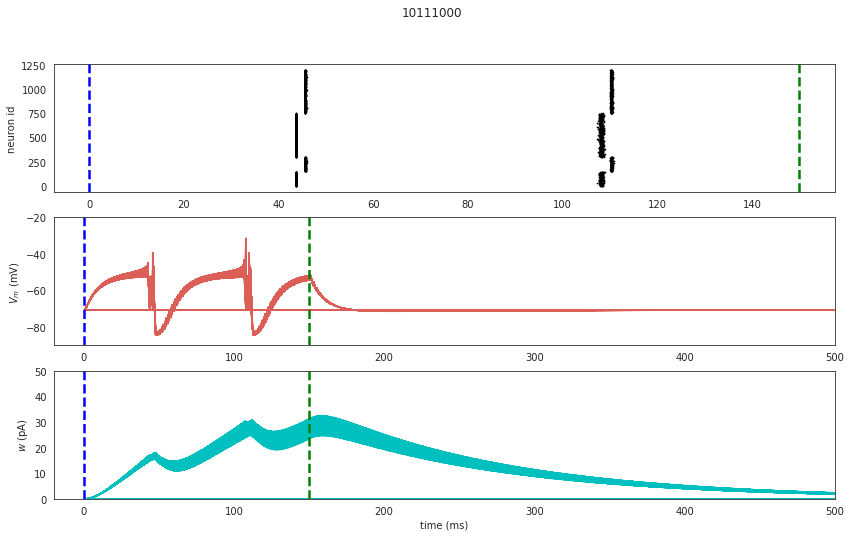

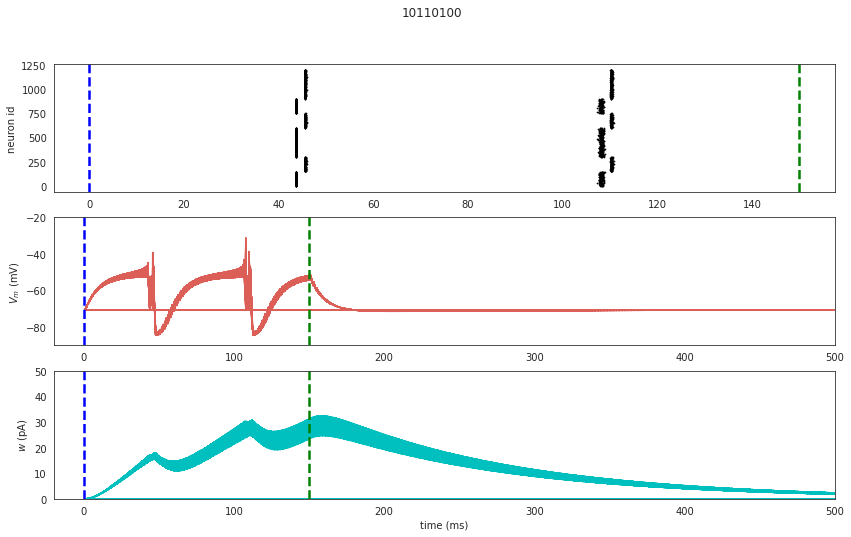

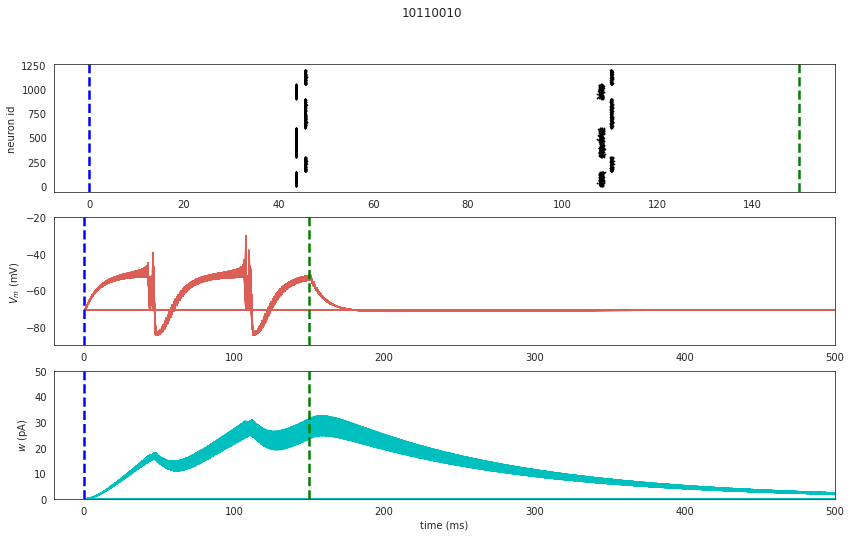

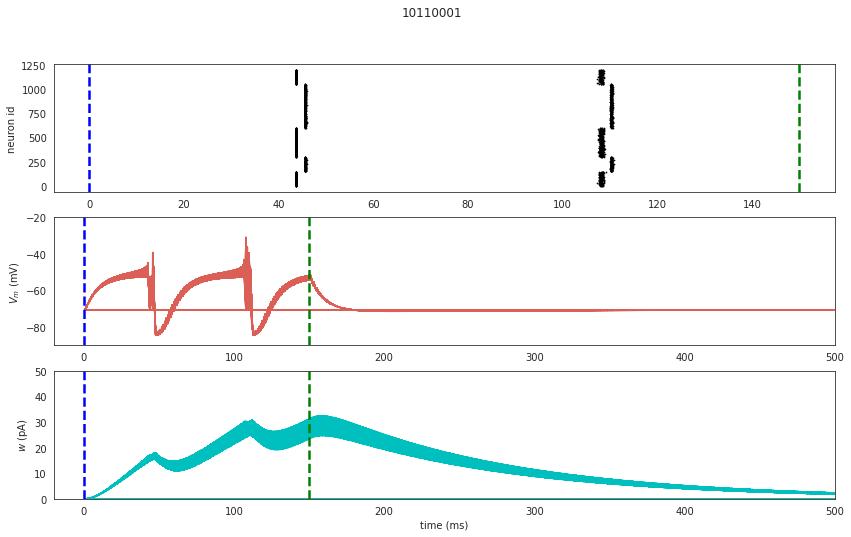

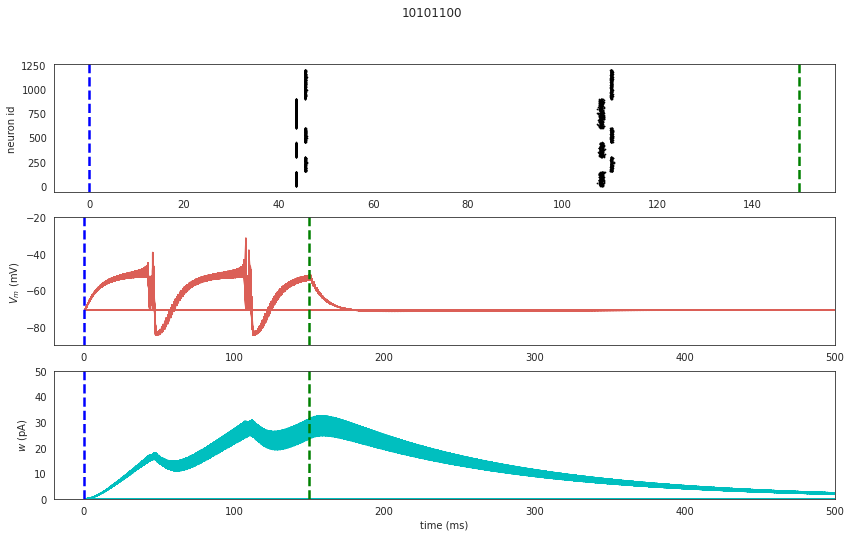

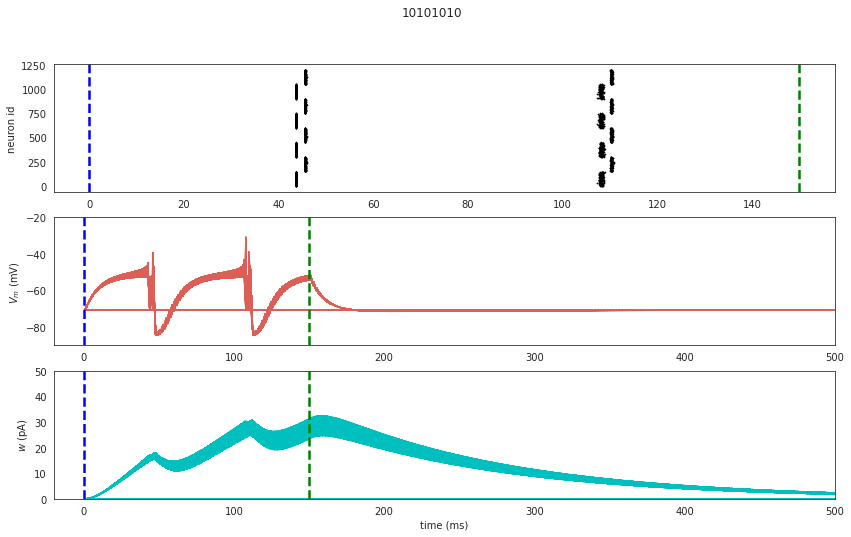

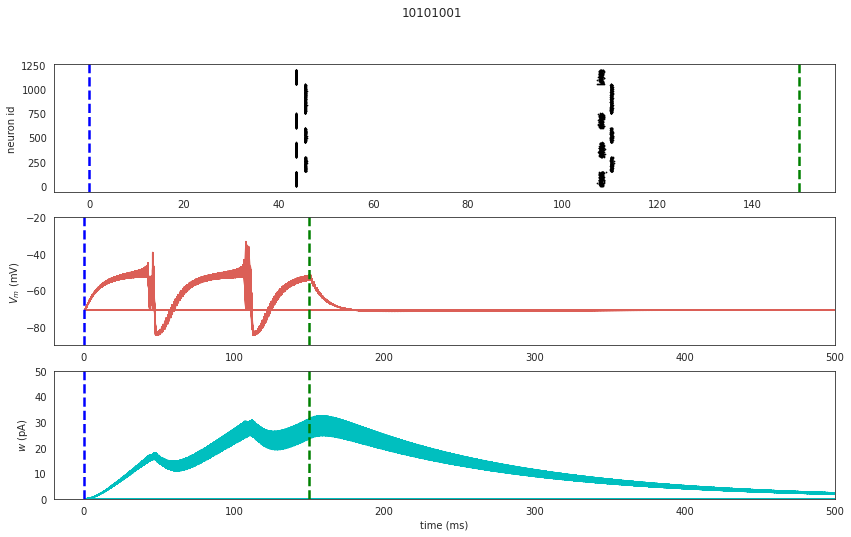

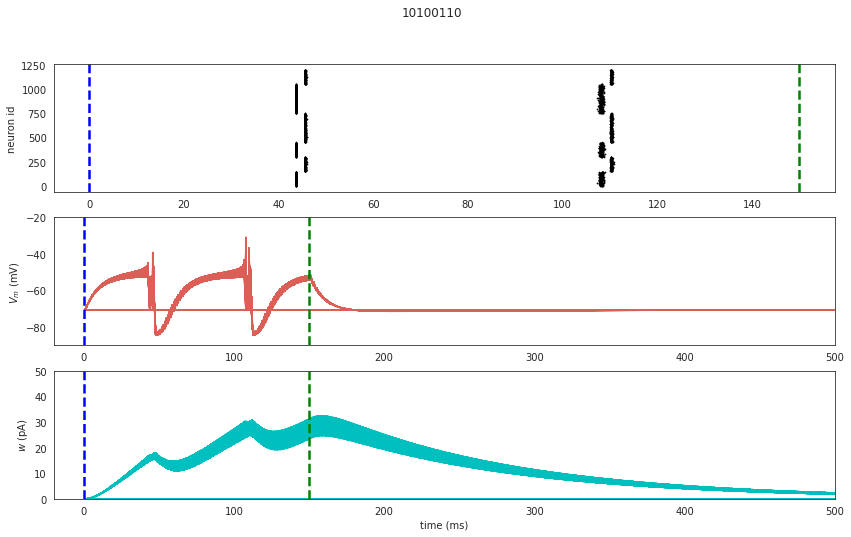

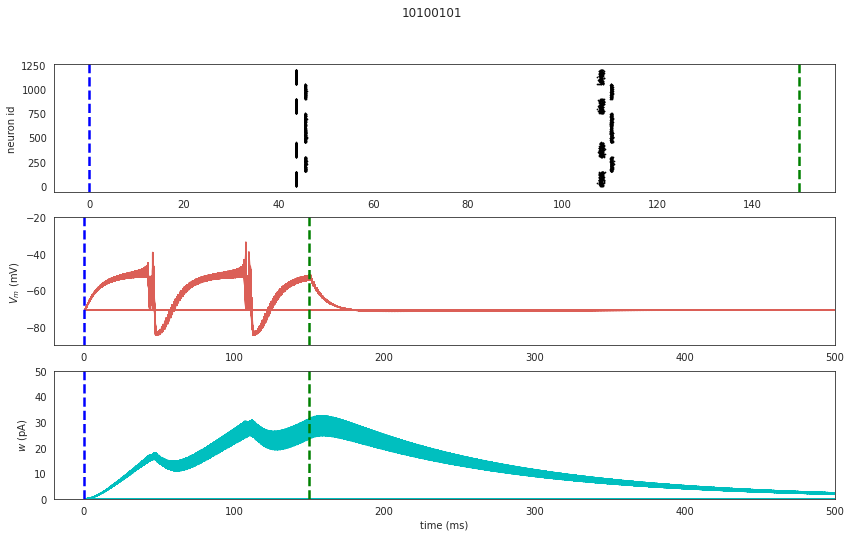

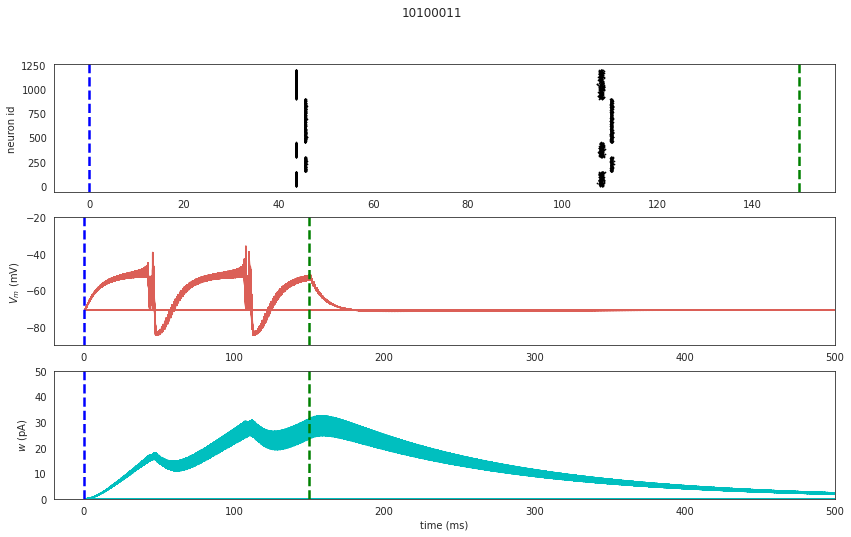

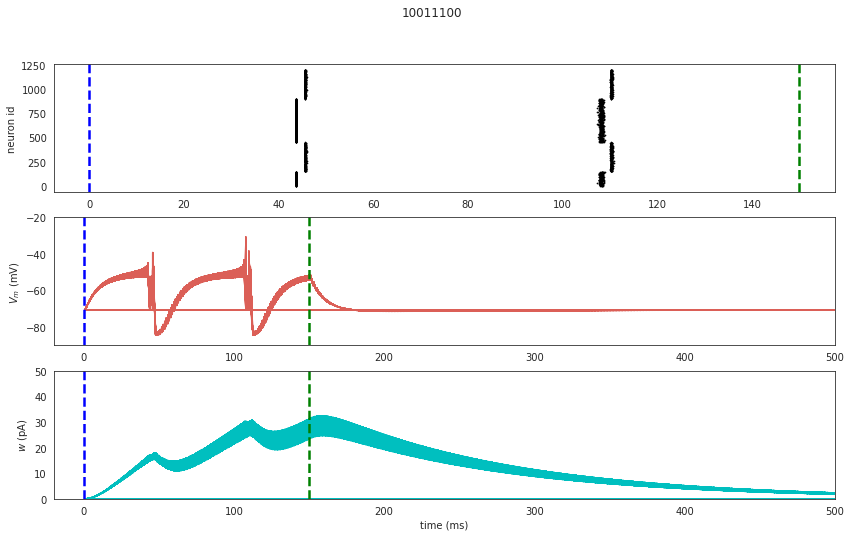

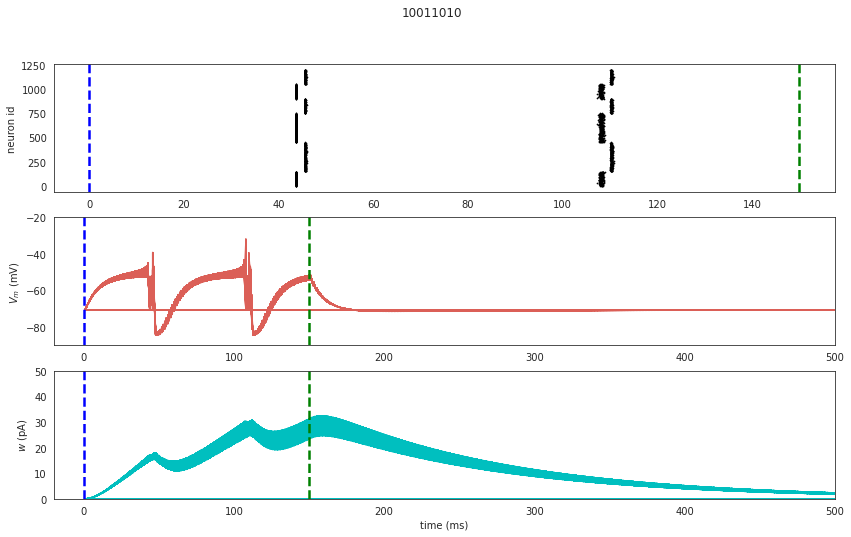

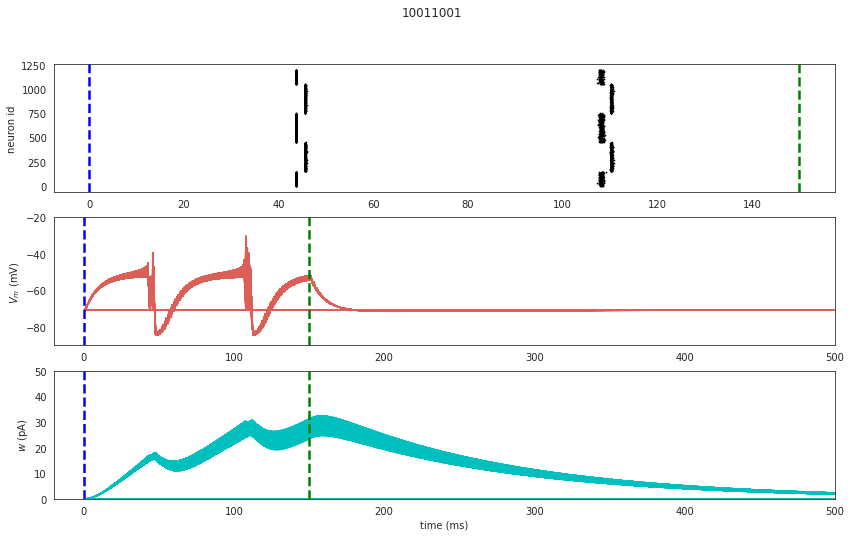

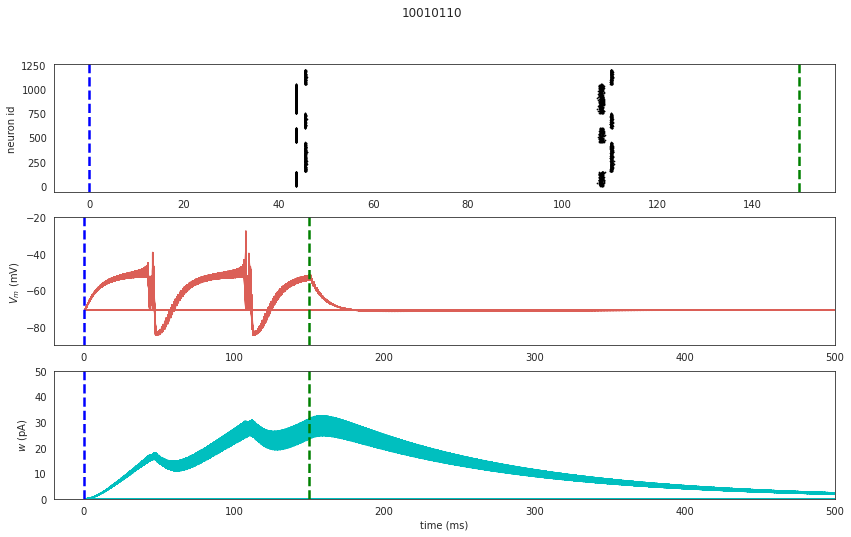

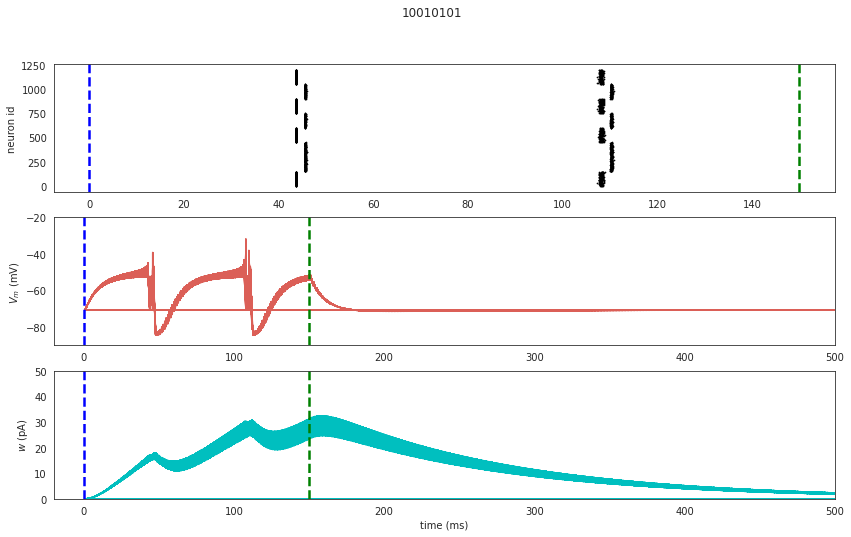

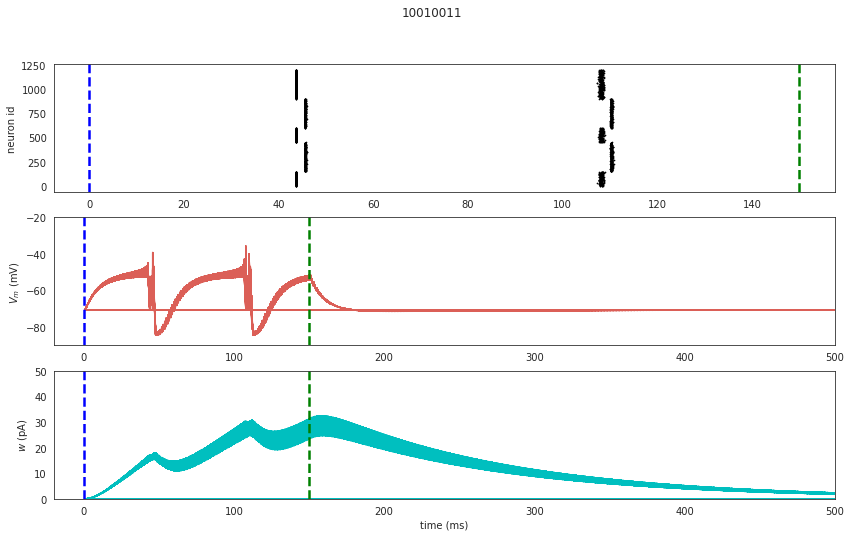

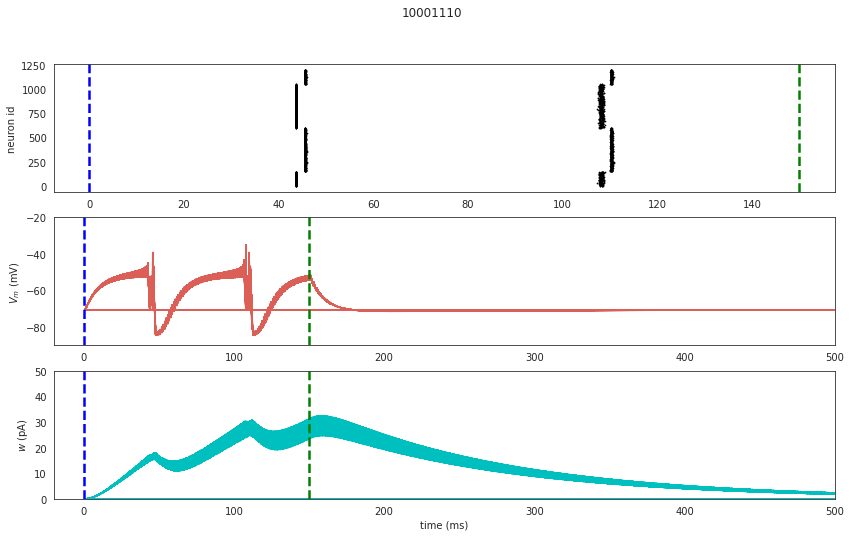

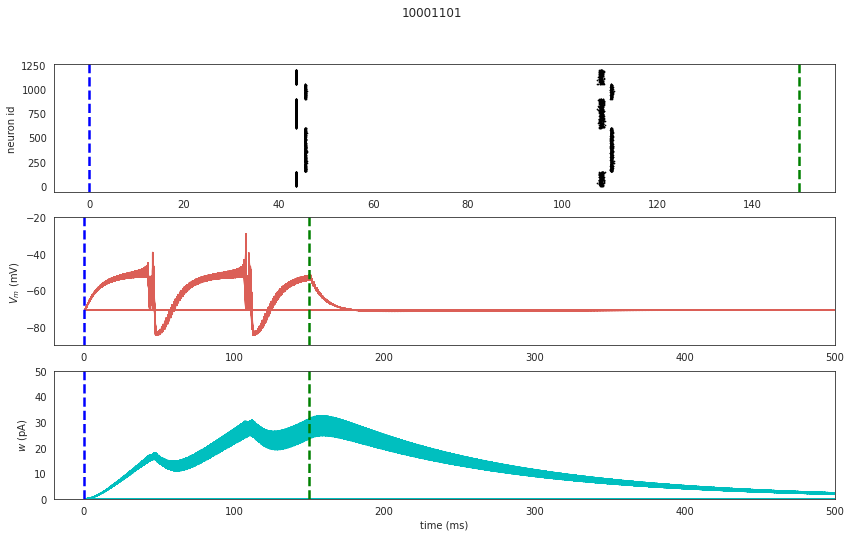

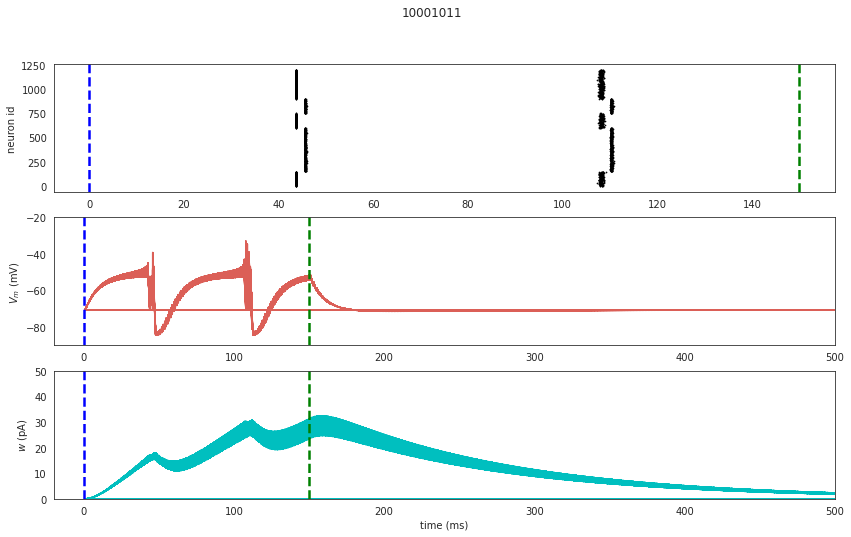

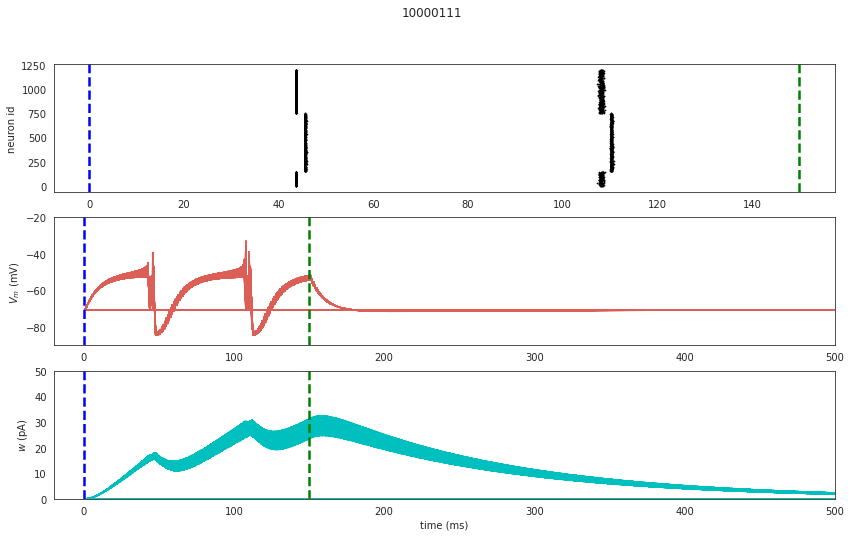

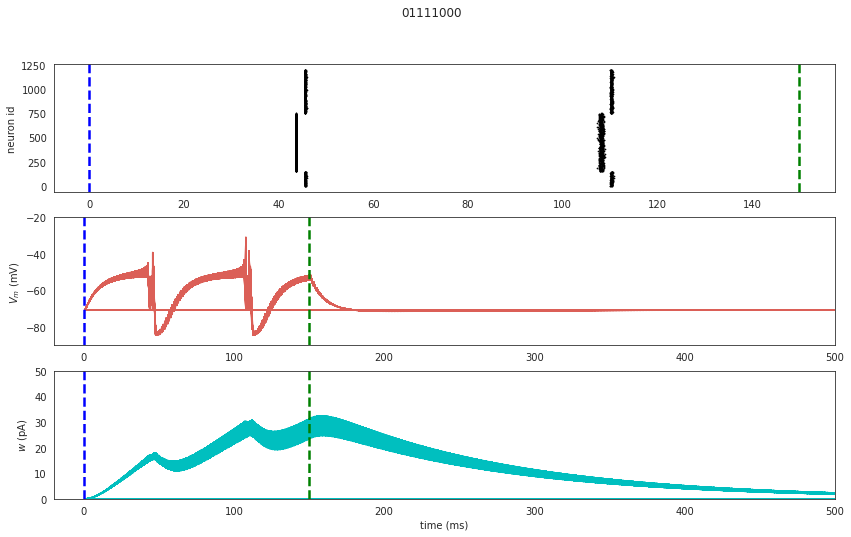

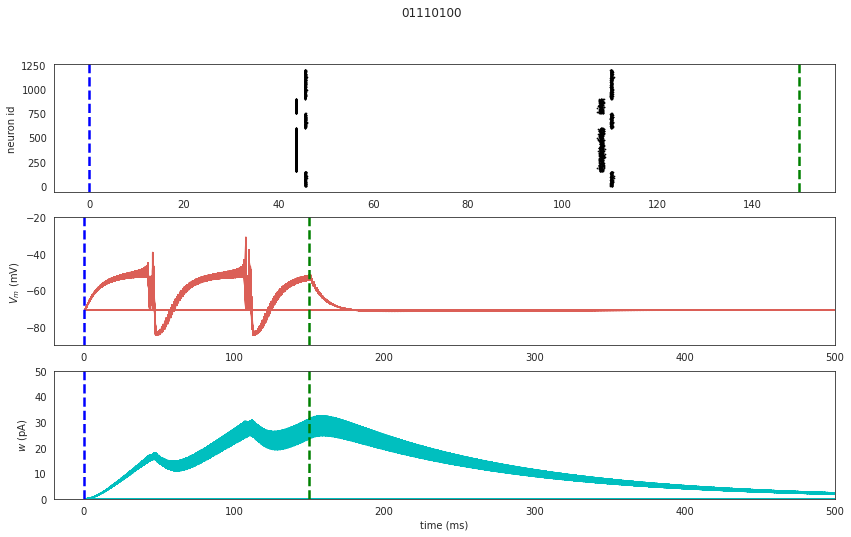

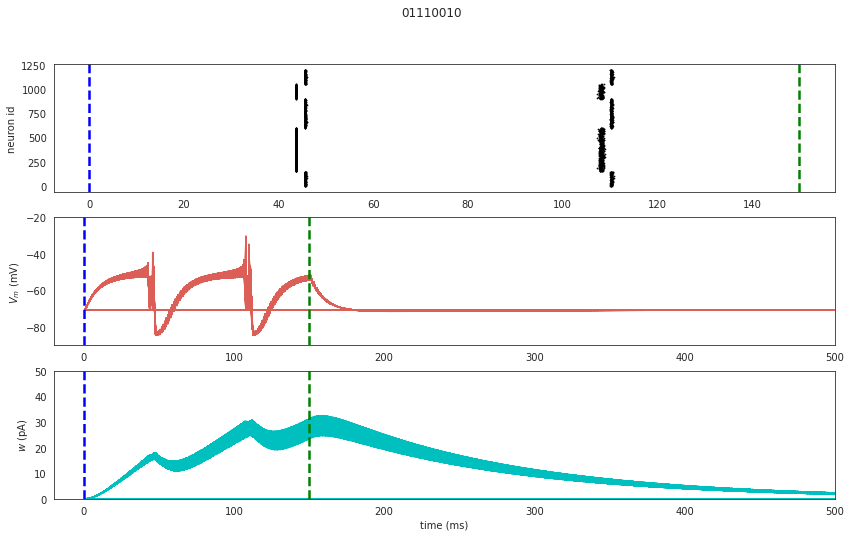

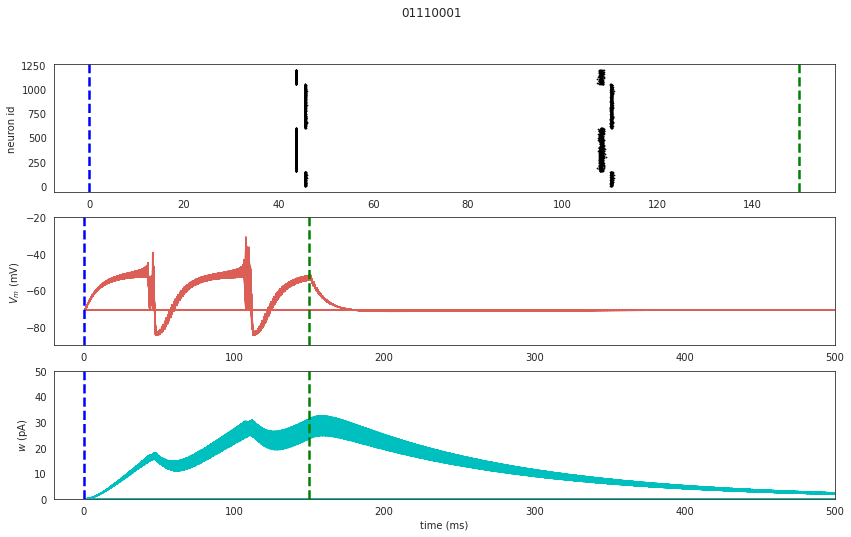

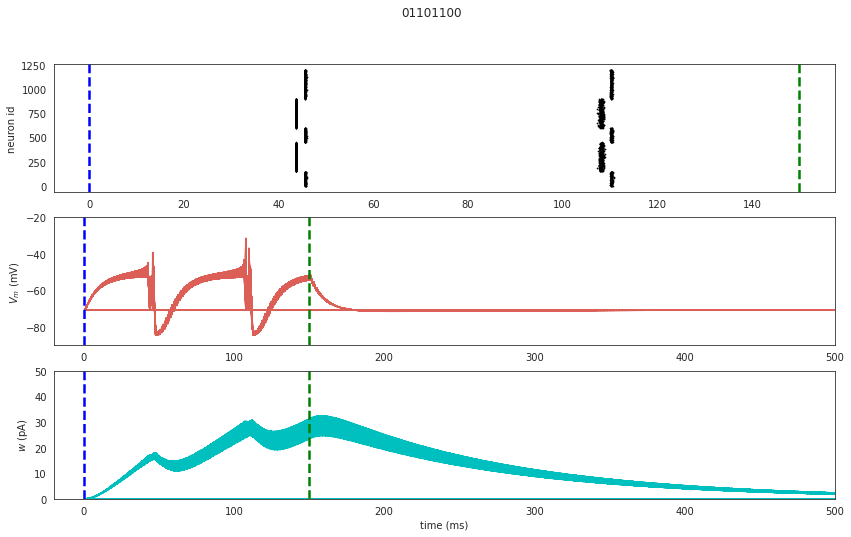

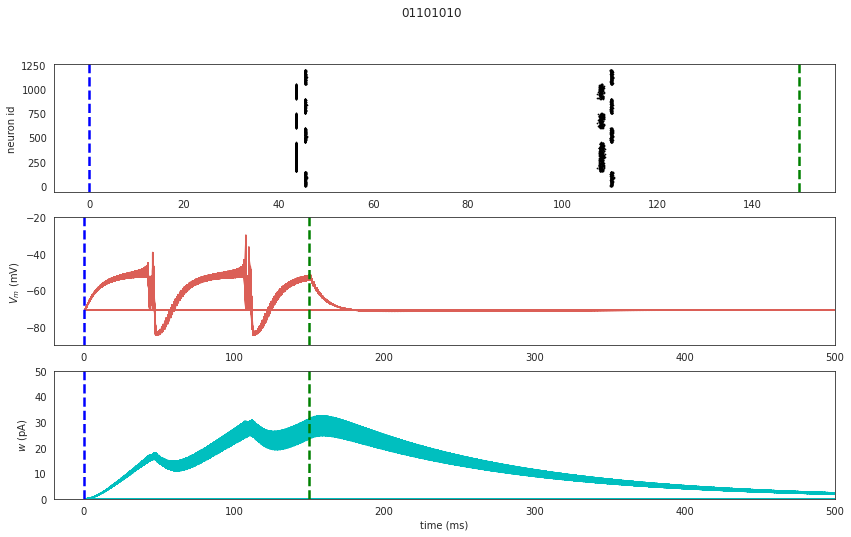

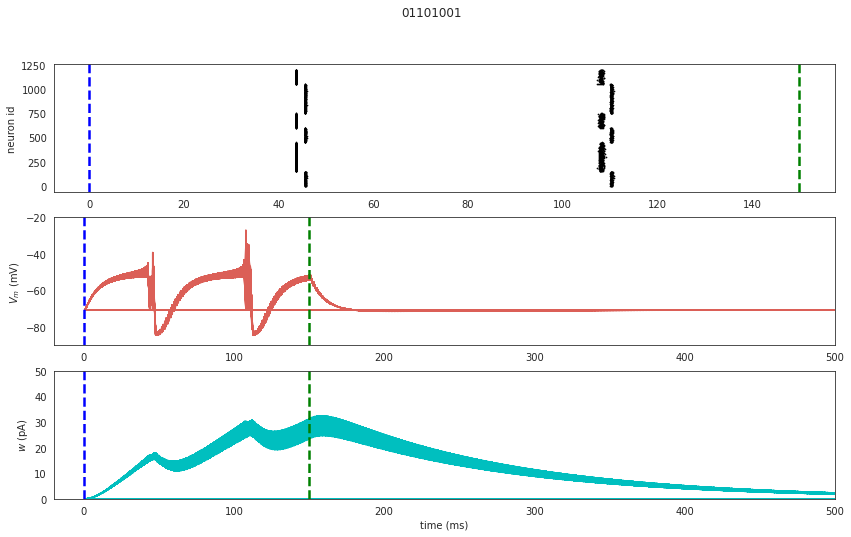

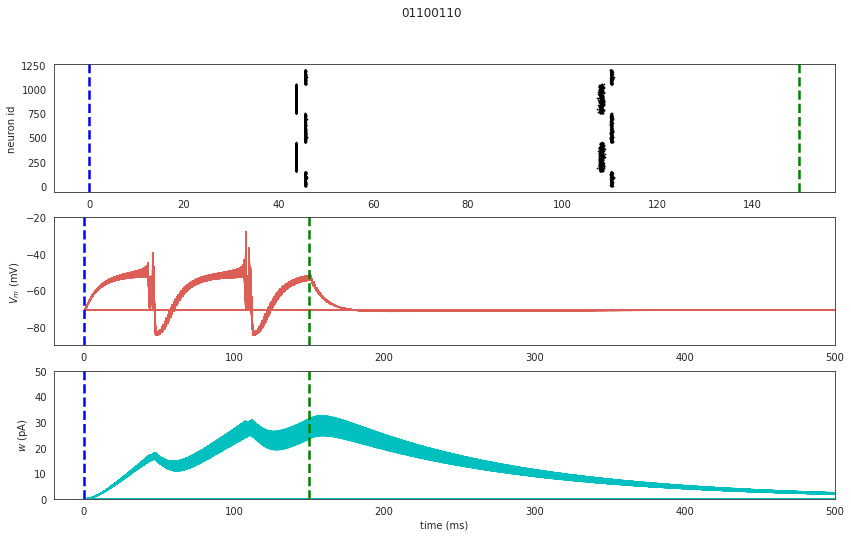

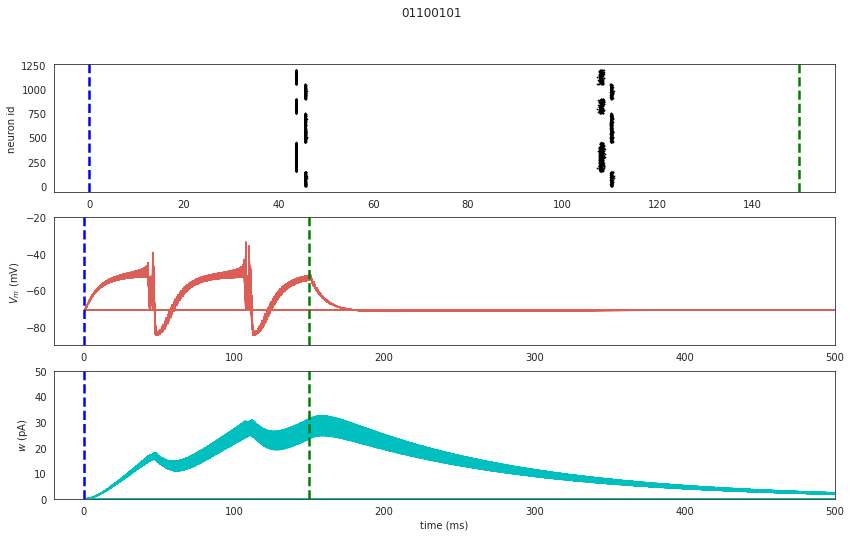

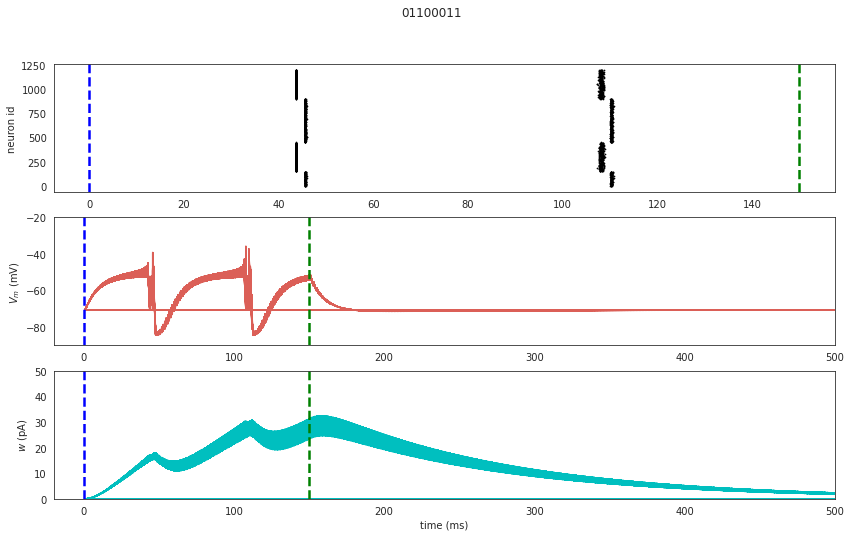

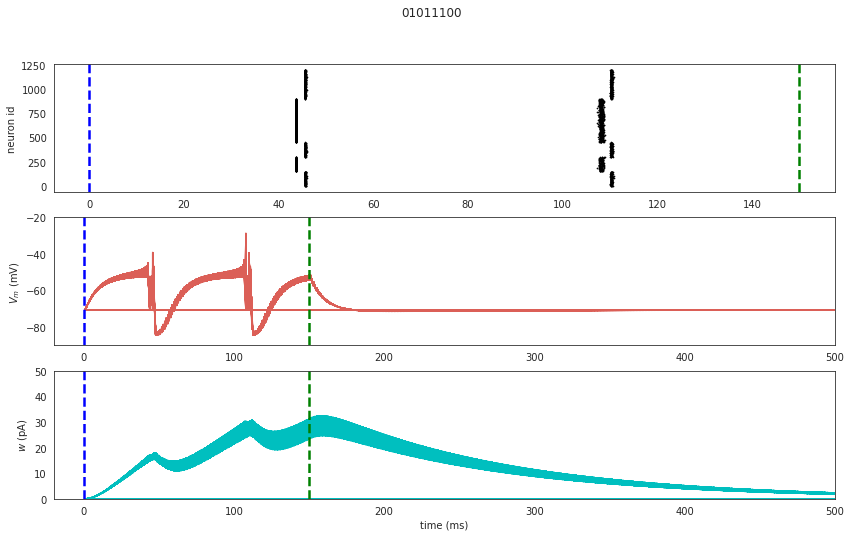

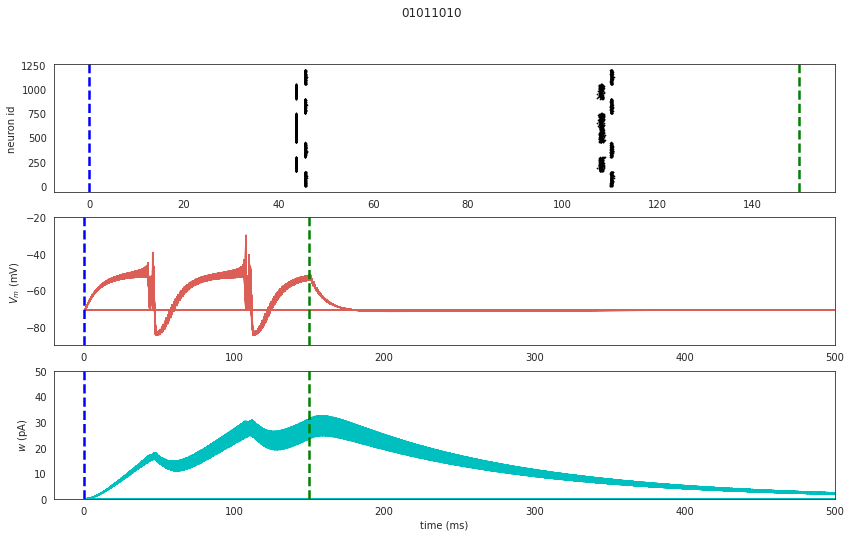

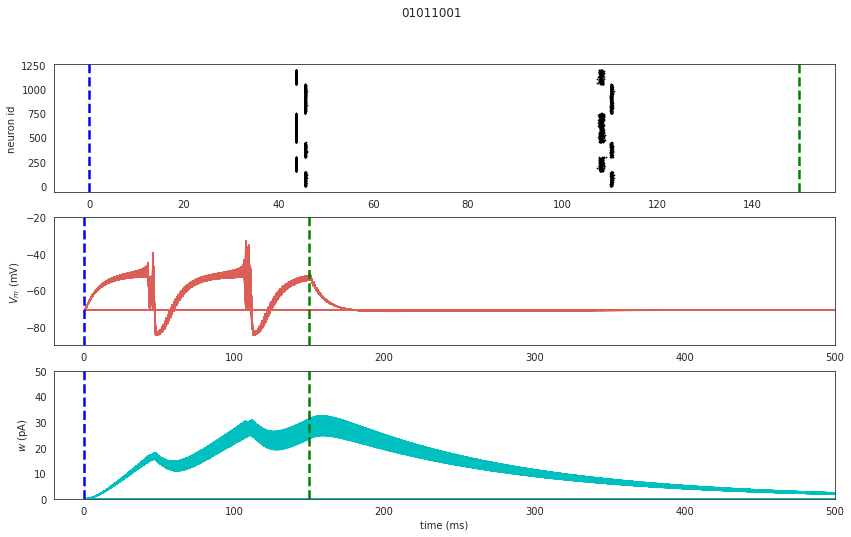

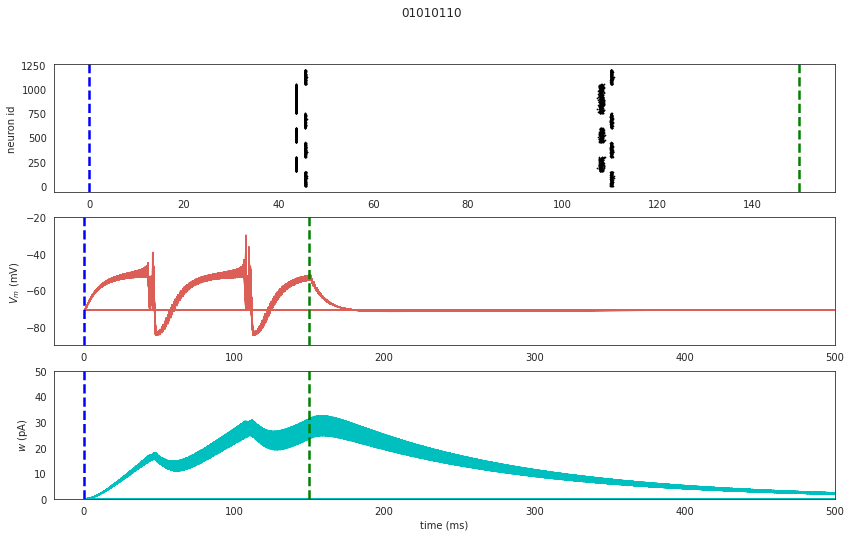

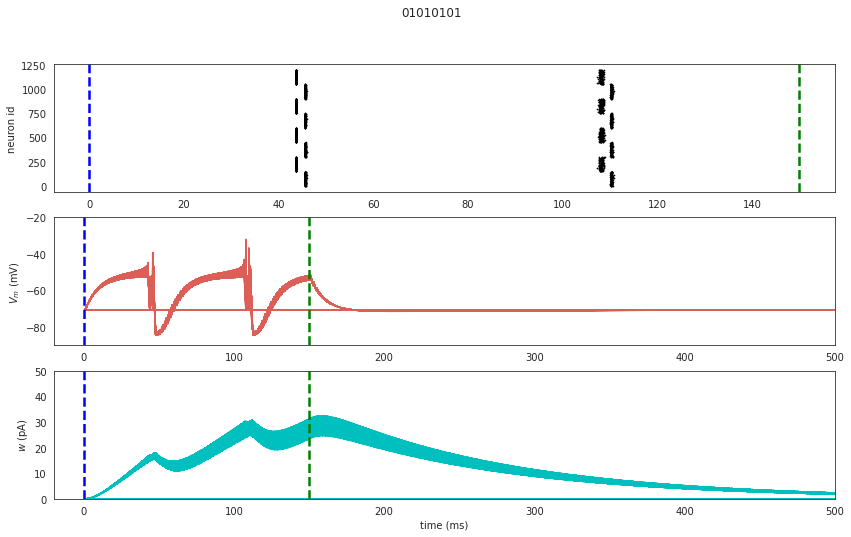

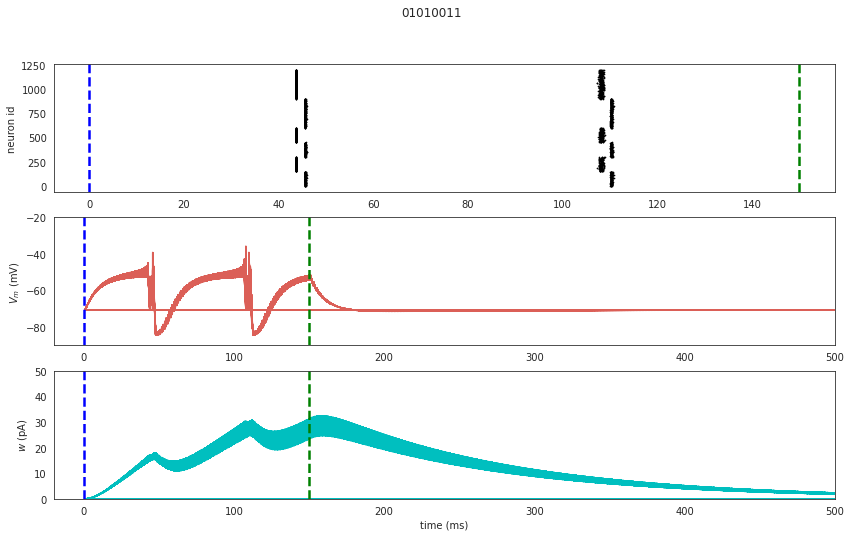

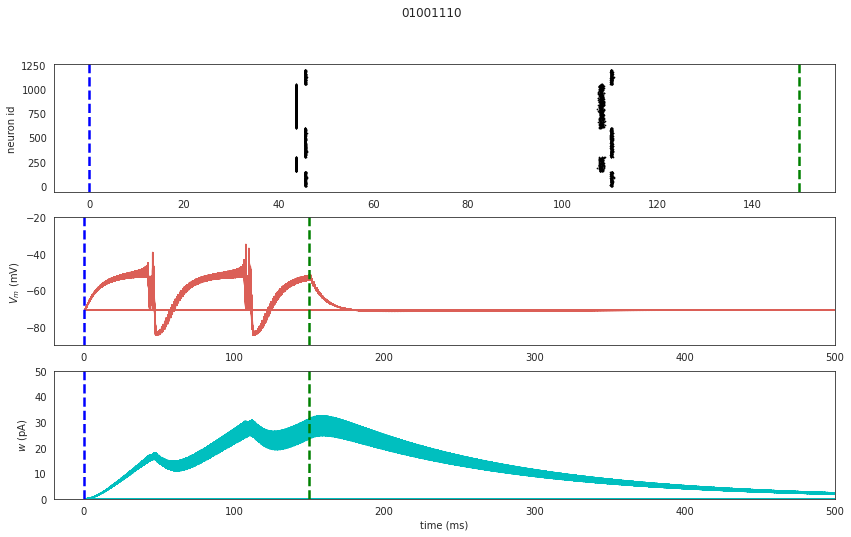

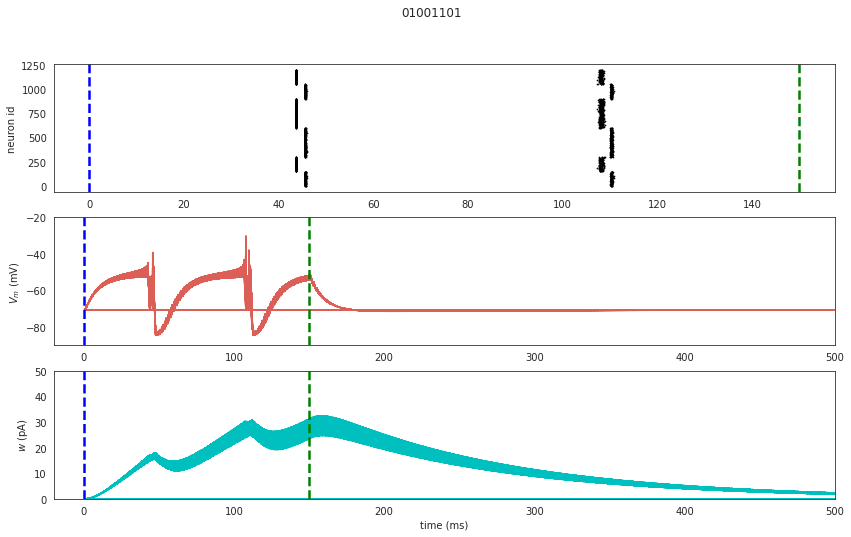

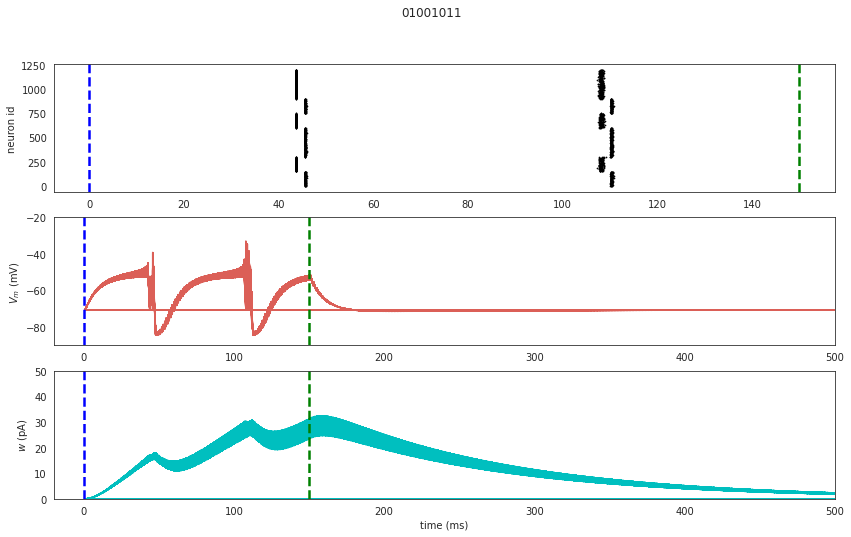

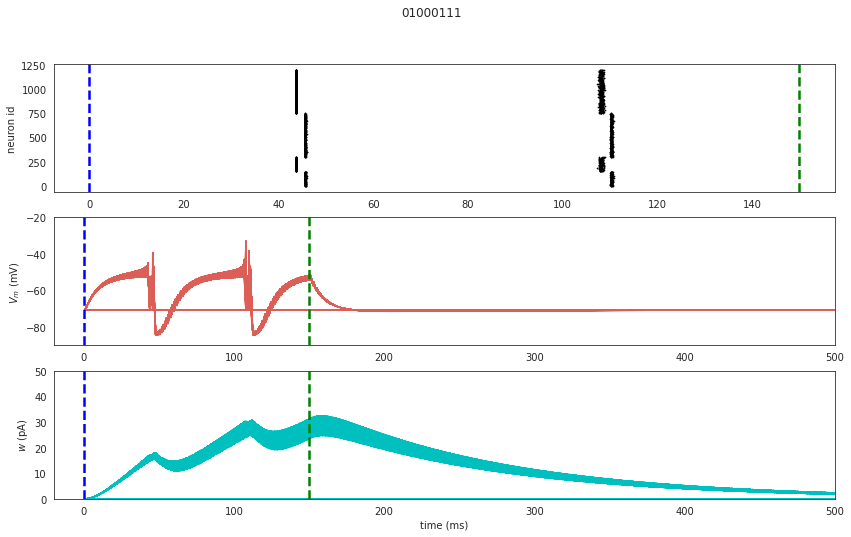

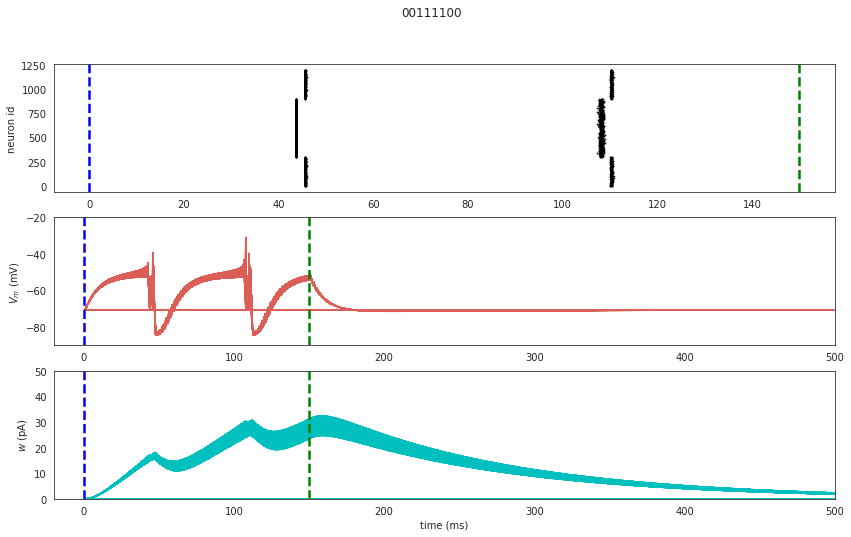

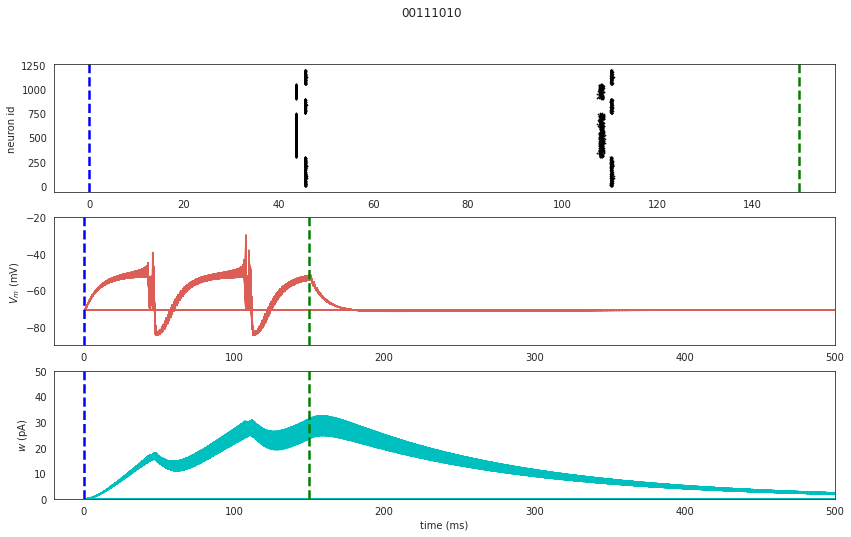

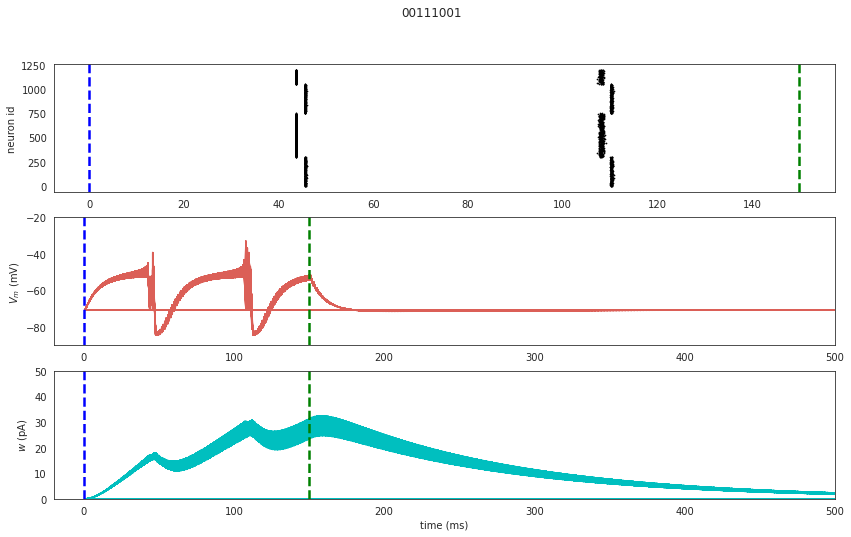

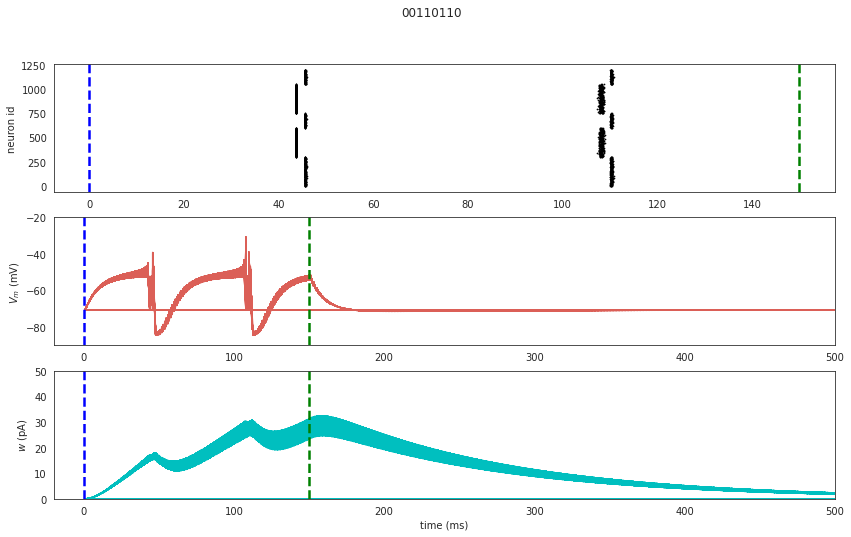

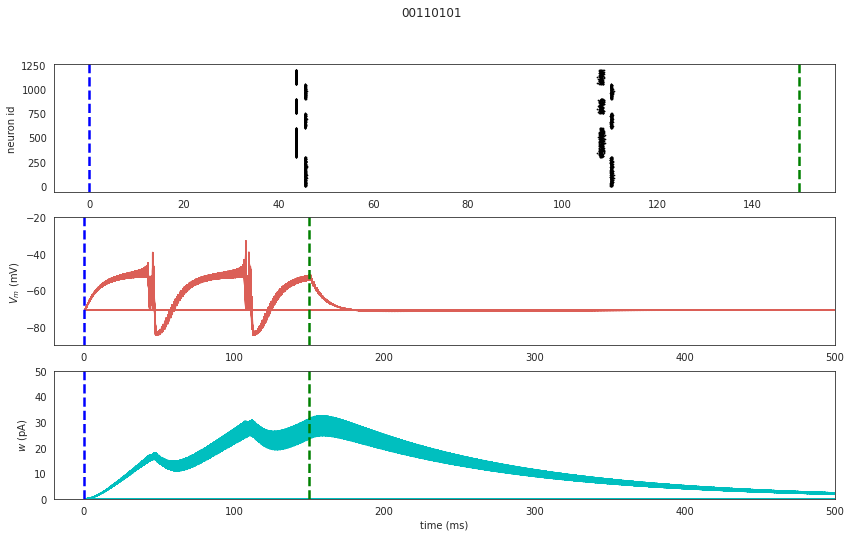

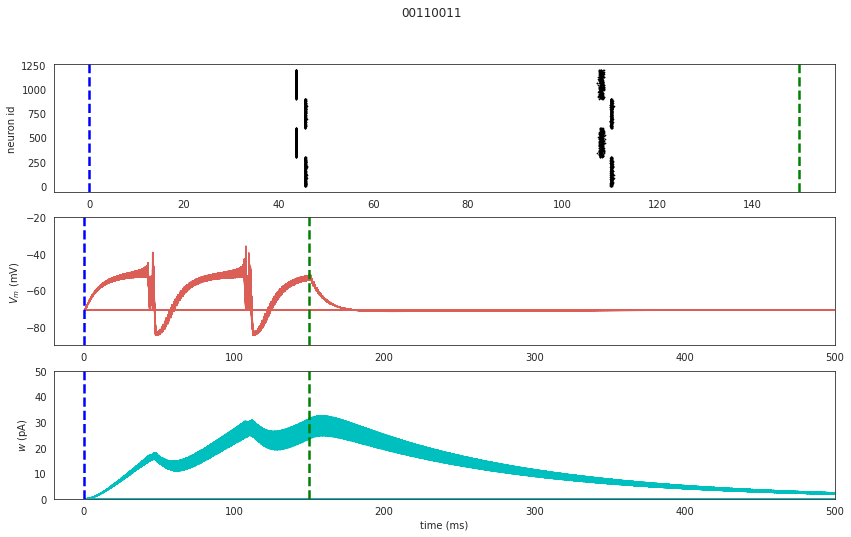

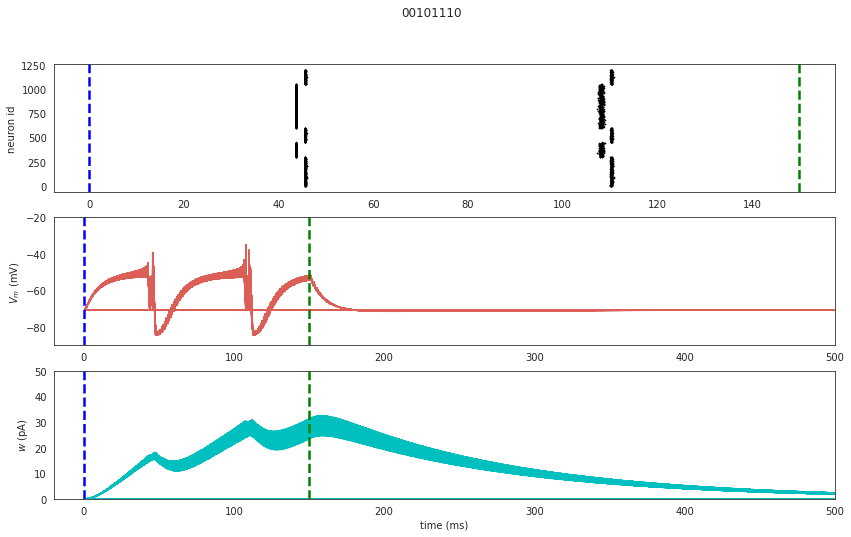

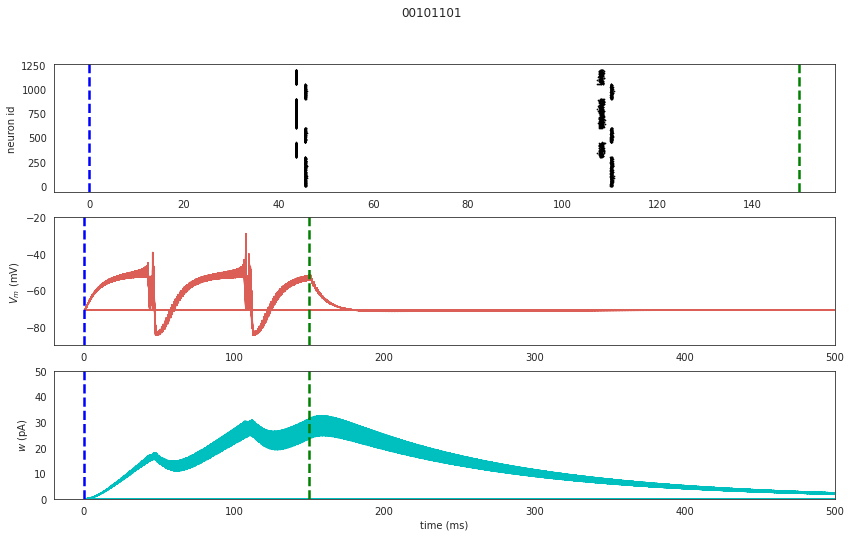

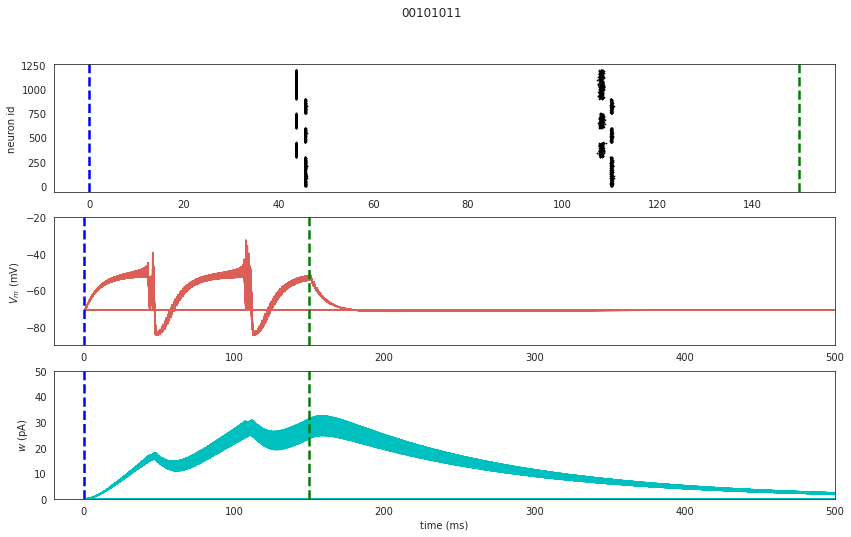

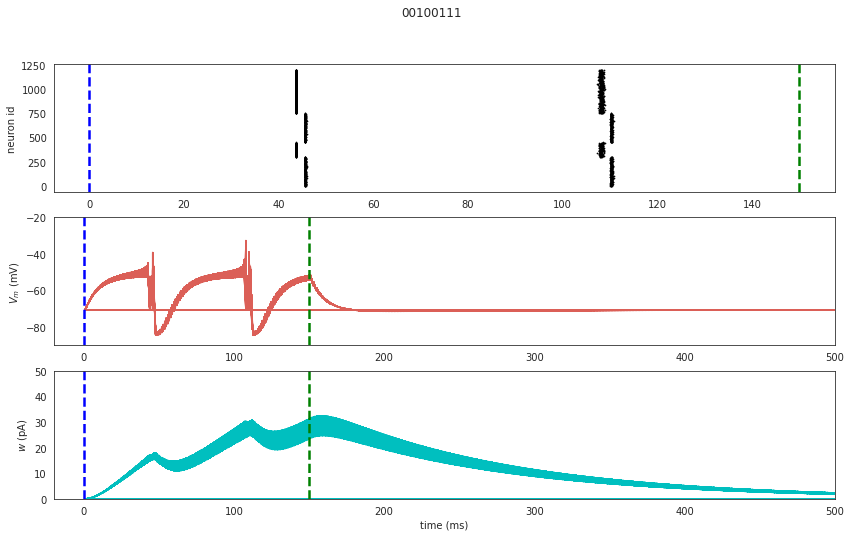

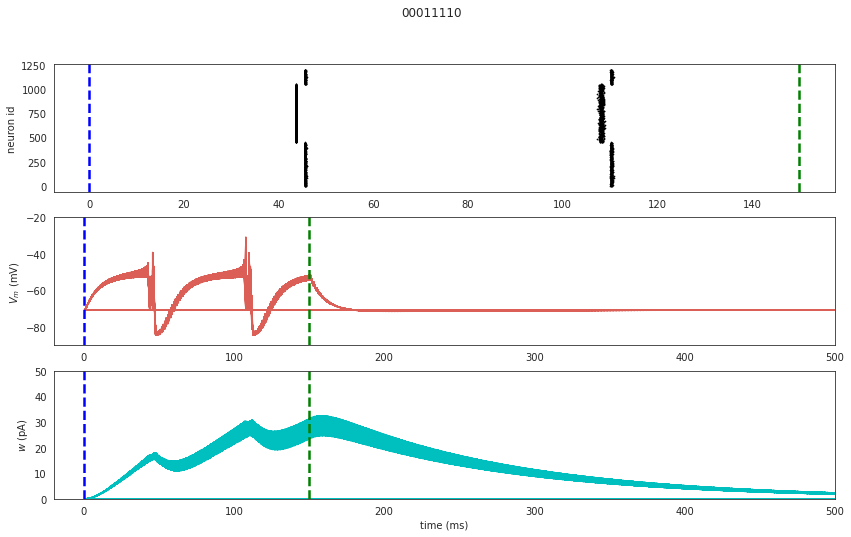

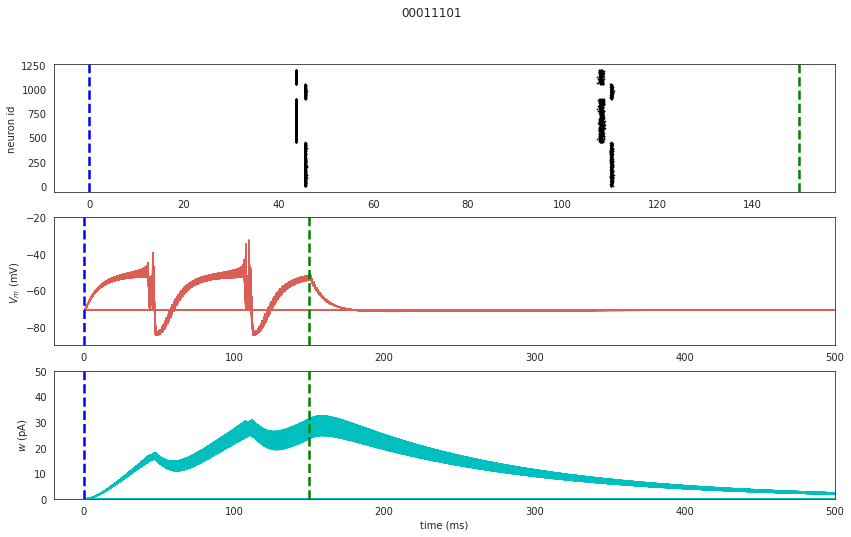

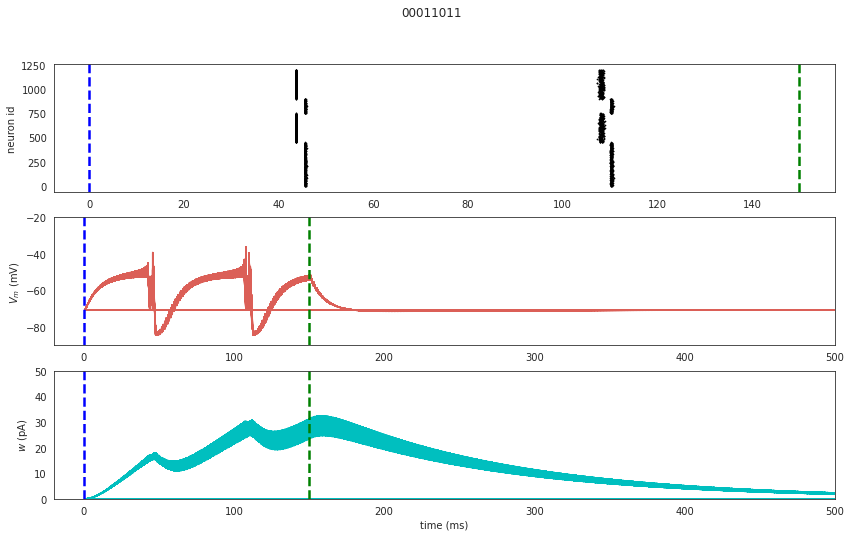

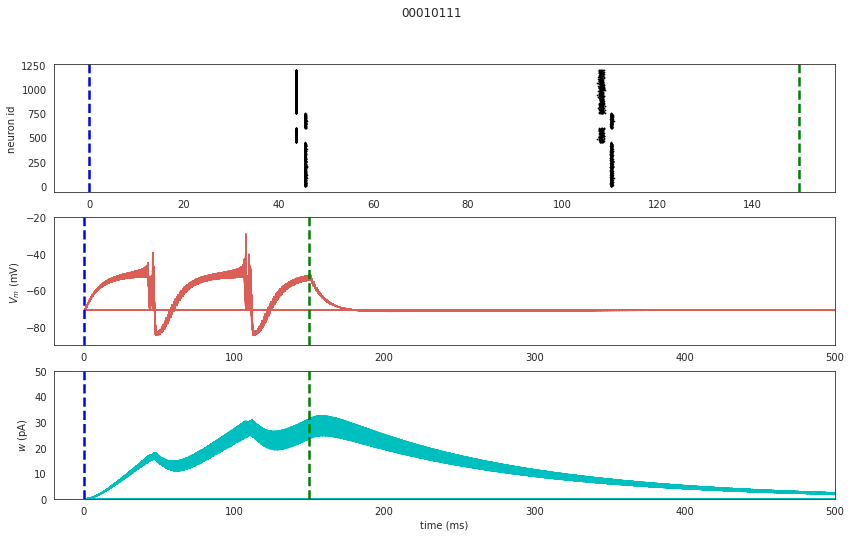

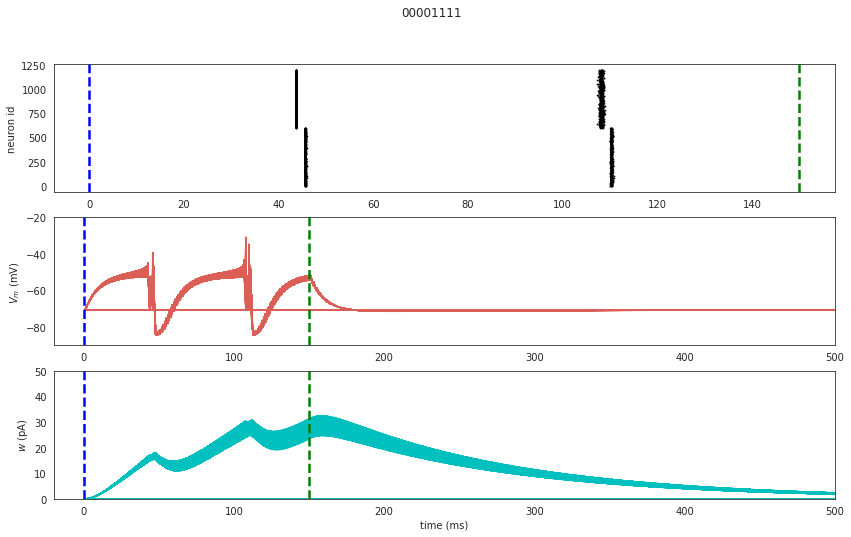

In [96]:
for i, pattern in enumerate(patterns):
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14,8))
    fig.suptitle(H.list2str(f'{patterns[i]}'))

    # raster plot
    ax1.scatter(spike_times_arr[i], spike_neurons_arr[i], marker='o', s=0.5, color='k');
    ax1.set_ylabel('neuron id')
    ax1.axvline(x=0, linewidth=2.5, color='b', linestyle='--')
    ax1.axvline(x=150, linewidth=2.5, color='g', linestyle='--')

    # voltage
    ax2.plot(times_lst[i], events_lst[i]['V_m'])
    ax2.set_ylabel('$V_m$ (mV)')
    ax2.axvline(x=0, linewidth=2.5, color='b', linestyle='--')
    ax2.axvline(x=150, linewidth=2.5, color='g', linestyle='--')
    ax2.axis([-20,500,-90,-20])

    # adaptation variable
    ax3.plot(times_lst[i], events_lst[i]['w'], color='c')
    ax3.set_ylabel('$w$ (pA)')
    ax3.set_xlabel('time (ms)')
    ax3.axvline(x=0, linewidth=2.5, color='b', linestyle='--')
    ax3.axvline(x=150, linewidth=2.5, color='g', linestyle='--')
    ax3.axis([-20,500,0,50])

## Zoomed in raster plots

In [29]:
# for i, pattern in enumerate(patterns):
#     f = plt.figure(figsize=(15,5))
#     plt.title(H.list2str(patterns[i]))
#     plt.scatter(spike_times_arr[i], spike_neurons_arr[i], marker='o', s=0.5, color='k');
#     plt.xlabel('Time (ms)')
#     plt.ylabel('Neuron id');

## Transient lifetime and size

In [104]:
transient_spikes, transient_lifetime, transient_size = get_transient_data(spike_times_arr,spike_neurons_arr, sim_params)

In [105]:
d = {'transient_spikes':transient_spikes, 'transient_lifetime':transient_lifetime, 'transient_size':transient_size}
df = pd.DataFrame(data=d)

In [106]:
df.describe()

,transient_spikes,transient_lifetime,transient_size
count,70.0,70.0,70.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


In [115]:
# for i, pattern in enumerate(patterns):
    
#     f = plt.figure(figsize=(22,5)) 
#     plt.title(H.list2str(pattern))
#     plt.scatter(spike_times_arr[i],spike_neurons_arr[i], marker='o', s=.05, color='k');
#     plt.xlabel('time (ms)')
#     plt.ylabel('neuron id')
#     plt.axis([-100,500,0, 1200])
#     plt.xticks([-100, 0, 50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000]) 
#     #plt.savefig(path+str(H.list2str(pattern))) uncommment to save figures

## 0. Using these functions (run this first)

In [2]:
# nest
from math import *
import nest
import nest.raster_plot
import nest.voltage_trace

# other
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os
import json
import time 
import timeit
import itertools
import numpy as np
from importlib import reload 
from itertools import permutations 
from itertools import combinations 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set_palette("hls")
# set the path 
path = 'data/'
# seed 
np.random.seed(0)

import SimulationClass_AdEx as simu_adex

# update changes made in python script
reload(simu_adex);

H = simu_adex.HelperFuncs()

patterns = []
# make permutations for 8 bit pattern
for perm in H.make_permutations():
    patterns.append(perm)
    
def simulate(patterns, sim_params, model_params):
    '''
    Returns
    spike_times_arr: array with the exact timings neurons spiked.
    spike_neurons_arr: array with indices of spiking neurons.
    '''
    
    # initialise classes
    udp = simu_adex.UpDownPatterns(sim_params, model_params)
    
    # spike stuffs
    spike_times_lst = []
    spike_neurons_lst = []
    spikedetectors = []
    
    # voltage stuffs
    times_lst = []
    events_lst = []
    multimeters = []

    # time duration
    start = time.time()

    for i, pattern in enumerate(patterns):
        label = H.list2str(pattern)
        spikedet, multimet, events, etimes, spike_times, spike_neurons = udp.simulate(pattern)
    
        # convert to python lists 
        spike_times.tolist()
        spike_neurons.tolist()

        spike_times_lst.append(spike_times)
        spike_neurons_lst.append(spike_neurons)
        multimeters.append(multimet)
        spikedetectors.append(spikedet)
        times_lst.append(etimes)
        events_lst.append(events)

    end = time.time()
    print(f'Simulation done! time: {round(end-start)} seconds')

    # convert to np arrays
    spike_times_arr = np.array(spike_times_lst)
    spike_neurons_arr = np.array(spike_neurons_lst)
    
    return multimeters, times_lst, events_lst, spike_times_arr, spike_neurons_arr


def get_transient_data(spike_times_arr, spike_neurons_arr, sim_params):
    '''
    Uses the information from the simulation run to get information about the transient.
    '''
    transient_spikes = []
    transient_lifetime = []
    transient_uniquen = []
    transient_time_arr = []
    
    stim_end = sim_params['stim_end']
    
    for trial in range(len(spike_times_arr)):

        # select data from experiment / trial
        times = spike_times_arr[trial]
        neurons = spike_neurons_arr[trial]

        # === number of spikes ===
        num_trans_spikes = sum(1*(times > stim_end))
        transient_spikes.append(num_trans_spikes)
        

        # === transient lifetime ===
        transient_time = times[times > stim_end]
        transient_time_arr.append(transient_time)

        if num_trans_spikes == 0:
            transient_lifetime.append(0)
        else:
            t_dur = round(max(transient_time_arr[trial]) - stim_end,2)
            transient_lifetime.append(t_dur)

        # === transient_size ===
        transients = 1*(times > stim_end)
        transient_indices = np.argwhere(transients)
        # take the neurons from these indices
        active_neurons = np.unique(neurons[transient_indices])
        transient_uniquen.append(active_neurons)

    transient_size = [len(i) for i in transient_uniquen]
    
    return transient_spikes, transient_lifetime, transient_size


def get_metrics(transient_size, transient_lifetime):
    
    df = pd.DataFrame({'transient_size':transient_size, 'transient_lifetime':transient_lifetime})
    
    mins = df.std().tolist()
    means = df.mean().tolist()
    maxs = df.max().tolist()
    
    return mins, means, maxs

def plot(transient_mins, transient_means, transient_maxs, x_axis_name, parameter_range):
    '''
    takes in a list of transient means and max values, name for the x_axis (the parameter value that is being changed) 
    and the range of parameter values used.
    
    Plots the graphs.
    '''
    # [mean transient size, mean transient lifetime]
    trans_size_mins = [i[0] for i in transient_mins]
    trans_lifetime_mins = [i[1] for i in transient_mins]
    
    trans_size_means = [i[0] for i in transient_means]
    trans_lifetime_means = [i[1] for i in transient_means]    

    trans_size_maxs = [item[0] for item in transient_maxs]
    trans_lifetime_maxs = [item[1] for item in transient_maxs]

    # === Plot ===
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.plot(parameter_range, trans_size_mins, '--go', label='min transient size');
    ax1.plot(parameter_range, trans_size_maxs, '--ro', label ='max transient size');
    ax1.plot(parameter_range, trans_size_means, '--bo', label='mean transient size');
    ax1.set_xlabel(x_axis_name)
    ax1.set_ylabel('transient size (neurons)')
    ax1.legend();
    
    ax2.plot(parameter_range, trans_lifetime_mins, '--go', label ='min transient times');
    ax2.plot(parameter_range, trans_lifetime_maxs, '--ro', label ='max transient times');
    ax2.plot(parameter_range, trans_lifetime_means, '--bo', label='mean transient times');
    ax2.set_xlabel(x_axis_name);
    ax2.set_ylabel('transient lifetime (ms)')
    ax2.legend();
    
def plot_statevars(spike_times_arr, spike_neurons_arr, times_lst, events_lst, idx,parameterisation='regular'):
    '''
    plot the dynamic state variables
    '''
    # ==== CHOOSE AN INDEX ====
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(14,12))
    fig.suptitle(f'Parameterisation name: {parameterisation} | Pattern: {H.list2str(patterns[idx])}', size=15)

    # raster plot
    ax1.scatter(spike_times_arr[idx], spike_neurons_arr[idx], marker='o', s=0.5, color='k');
    ax1.set_ylabel('neuron id')
    ax1.axvline(x=0, linewidth=2, color='xkcd:dark blue', linestyle='--')
    ax1.axvline(x=150, linewidth=2, color='xkcd:dark blue', linestyle='--')

    # voltage
    ax2.plot(times_lst[idx], events_lst[idx]['V_m'], color='xkcd:salmon')
    ax2.set_ylabel('$V_m$ (mV)')
    ax2.axvline(x=0, linewidth=2, color='xkcd:dark blue', linestyle='--')
    ax2.axvline(x=150, linewidth=2, color='xkcd:dark blue', linestyle='--')
    #ax2.axis([-20,500,-90,-20])
    ax2.set_xlim([-20, 500])

    # adaptation variable
    ax3.plot(times_lst[idx], events_lst[idx]['w'], color='xkcd:sky blue')
    ax3.set_ylabel('$w$ (pA)')
    ax3.set_xlabel('time (ms)')
    ax3.axvline(x=0, linewidth=2, color='xkcd:dark blue', linestyle='--')
    ax3.axvline(x=150, linewidth=2, color='xkcd:dark blue', linestyle='--')
    ax3.set_xlim([-20, 500])

    # adaptation variable
    ax4.plot(times_lst[idx], events_lst[idx]['g_in'], color='xkcd:sea green', label='g_in')
    ax4.plot(times_lst[idx], events_lst[idx]['g_ex'], color='xkcd:red orange', label='g_ex')
    ax4.set_ylabel('synaptic conductance (nS)')
    ax4.set_xlabel('time (ms)')
    ax4.axvline(x=0, linewidth=2, color='xkcd:dark blue', linestyle='--')
    ax4.axvline(x=150, linewidth=2, color='xkcd:dark blue', linestyle='--')
    #ax4.axis([-20,500,0,2000]);
    ax4.set_xlim([-20, 500])
    ax4.legend();

In [164]:
# # ==== CHOOSE AN INDEX ====
# idx = 5

# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(14,12))
# fig.suptitle(H.list2str(patterns[idx]))

# # raster plot
# ax1.scatter(spike_times_arr[idx], spike_neurons_arr[idx], marker='o', s=0.5, color='k');
# ax1.set_ylabel('neuron id')
# ax1.axvline(x=0, linewidth=2, color='xkcd:dark blue', linestyle='--')
# ax1.axvline(x=150, linewidth=2, color='xkcd:dark blue', linestyle='--')

# # voltage
# ax2.plot(times_lst[idx], events_lst[idx]['V_m'], color='xkcd:salmon')
# ax2.set_ylabel('$V_m$ (mV)')
# ax2.axvline(x=0, linewidth=2, color='xkcd:dark blue', linestyle='--')
# ax2.axvline(x=150, linewidth=2, color='xkcd:dark blue', linestyle='--')
# ax2.axis([-20,500,-90,-20])

# # adaptation variable
# ax3.plot(times_lst[idx], events_lst[idx]['w'], color='xkcd:sky blue')
# ax3.set_ylabel('$w$ (pA)')
# ax3.set_xlabel('time (ms)')
# ax3.axvline(x=0, linewidth=2, color='xkcd:dark blue', linestyle='--')
# ax3.axvline(x=150, linewidth=2, color='xkcd:dark blue', linestyle='--')
# ax3.axis([-20,500,0,50]);

# # adaptation variable
# ax4.plot(times_lst[idx], events_lst[idx]['g_in'], color='xkcd:sea green', label='g_in')
# ax4.plot(times_lst[idx], events_lst[idx]['g_ex'], color='xkcd:red orange', label='g_ex')
# ax4.set_ylabel('synaptic conductance (nS)')
# ax4.set_xlabel('time (ms)')
# ax4.axvline(x=0, linewidth=2, color='xkcd:dark blue', linestyle='--')
# ax4.axvline(x=150, linewidth=2, color='xkcd:dark blue', linestyle='--')
# #ax4.axis([-20,500,0,2000]);
# ax4.legend();